# Analizar la lista de El-Badry et al.(2018)

In [1]:
%matplotlib inline

In [3]:
from binaries import *
picklename='ElBadry-Rix_new.pkl'

In [4]:
plt.plot(np.random.random_sample(100))

In [6]:
pd.read_csv('200_pc_ms_ms_with_masses.csv').rename(
    columns={
        'pmra_error2':'pmra2_err',
        'pmdec_error2':'pmdec2_err',
        'radial_velocity2':'rv2',
        'radial_velocity_error2':'rv2_err',
        'source_id':'source_id1',
        'ra':'ra1',
        'dec':'dec1',
        'pmra':'pmra1',
        'pmra_error':'pmra1_err',
        'pmdec':'pmdec1',
        'pmdec_error':'pmdec1_err',
        'phot_g_mean_mag':'phot_g_mean_mag1',
        'phot_bp_mean_mag':'phot_bp_mean_mag1',
        'phot_rp_mean_mag':'phot_rp_mean_mag1',
        'parallax':'parallax1',
        'parallax_over_error':'parallax_over_error1',
        'astrometric_chi2_al':'astrometric_chi2_al1',
        'astrometric_n_good_obs_al':'astrometric_n_good_obs_al1',
        'phot_g_mean_flux_over_error':'phot_g_mean_flux_over_error1',
        'phot_rp_mean_flux_over_error':'phot_rp_mean_flux_over_error1',
        'phot_bp_mean_flux_over_error':'phot_bp_mean_flux_over_error1',
        'phot_bp_rp_excess_factor':'phot_bp_rp_excess_factor1',
        'radial_velocity':'rv1',
        'radial_velocity_error':'rv1_err',
        'rv_nb_transits':'rv_nb_transits1'}).to_pickle(picklename)

## Empieza el análisis de la lista de El-Badry

### Cargar la lista pickleizada

In [5]:
#Importar la table picklizada
tab=pd.read_pickle(picklename)

In [6]:
print(list(tab.columns))

['source_id2', 'ra2', 'dec2', 'astrometric_chi2_al_2', 'astrometric_n_good_obs_al2', 'phot_g_mean_flux_over_error2', 'phot_rp_mean_flux_over_error2', 'phot_bp_mean_flux_over_error2', 'phot_bp_rp_excess_factor2', 'pmra2', 'pmra2_err', 'pmdec2', 'pmdec2_err', 'phot_g_mean_mag2', 'phot_bp_mean_mag2', 'phot_rp_mean_mag2', 'parallax2', 'parallax_over_error2', 'rv2', 'rv2_err', 'rv_nb_transits2', 'source_id1', 'ra1', 'dec1', 'pmra1', 'pmra1_err', 'pmdec1', 'pmdec1_err', 'phot_g_mean_mag1', 'phot_bp_mean_mag1', 'phot_rp_mean_mag1', 'parallax1', 'parallax_over_error1', 'astrometric_chi2_al1', 'astrometric_n_good_obs_al1', 'phot_g_mean_flux_over_error1', 'phot_rp_mean_flux_over_error1', 'phot_bp_mean_flux_over_error1', 'phot_bp_rp_excess_factor1', 'rv1', 'rv1_err', 'rv_nb_transits1', 'pairdistance', 'binary_class', 's_AU', 'mass1', 'mass2', 'type1', 'type2']


In [5]:
# Valores para GAIA DR2

tab['dist1']     = 1000./tab.parallax1
tab['dist1_err'] = tab.dist1/tab.parallax_over_error1

tab['dist2']     = 1000./tab.parallax2
tab['dist2_err'] = tab.dist2/tab.parallax_over_error2

#usando la fórmula de distancia angular, ley de cosenos

tab['cos_angsep_GDR2']      = cos_distang(tab.ra1, tab.dec1,
                                          tab.ra2, tab.dec2)

#tab['cos_angsep_GDR2_err']  = dcd(tab.ra1, tab.dec1, tab.ra2, tab.dec2,
#                                  tab.ra_error_x/3.6E6, tab.dec_error_x/3.6E6,
#                                  tab.ra_error_y/3.6E6, tab.dec_error_y/3.6E6)

tab['proy_sep_GDR2']        = R3D(0.5*(tab.dist1+tab.dist2),
                                  0.5*(tab.dist1+tab.dist2),
                                  tab.cos_angsep_GDR2)
#tab['proy_sep_error_GDR2']  = dR3D(500*(1./tab.parallax_x + 1./tab.parallax_y),500*(1./tab.parallax_x + 1./tab.parallax_y),
#                                tab.cos_angsep_GDR2,
#                                1000*(tab.parallax_error_x/tab.parallax_x**2 + tab.parallax_error_y/tab.parallax_y**2),
#                                1000*(tab.parallax_error_x/tab.parallax_x**2 + tab.parallax_error_y/tab.parallax_y**2),
#                                tab.dcos_angsep_GDR2)

# Relative velocity on the sky perpendicular component
tab['rel_vel_GDR2']     = vel_tan_diff(tab.pmra1,tab.pmdec1,tab.dist1,
                                       tab.pmra2,tab.pmdec2,tab.dist2)

tab['rel_vel_GDR2_err'] = vel_tan_diff_err(tab.pmra1,tab.pmra1_err,tab.pmdec1,tab.pmdec1_err,
                                           tab.dist1,tab.dist1_err,
                                           tab.pmra2,tab.pmra2_err,tab.pmdec2,tab.pmdec2_err,
                                           tab.dist2,tab.dist2_err)
# Spin corrections
tab['corr_pmra1'],tab['corr_pmdec1']         = D_model_correction(tab.ra1,tab.dec1,tab.phot_g_mean_mag1)
tab['corr_pmra2'],tab['corr_pmdec2']         = D_model_correction(tab.ra2,tab.dec2,tab.phot_g_mean_mag2)
tab['corr_pmra1_err'],tab['corr_pmdec1_err'] = D_model_correction_err(tab.ra1,tab.dec1,tab.phot_g_mean_mag1)
tab['corr_pmra2_err'],tab['corr_pmdec2_err'] = D_model_correction_err(tab.ra2,tab.dec2,tab.phot_g_mean_mag2)

#Use Jimenez correction
if (False):
    tab.pmra1   = tab.pmra1 + tab.corr_pmra1
    tab.pmra2   = tab.pmra2 + tab.corr_pmra2
    tab.pmdec1  = tab.pmdec1 + tab.corr_pmdec1
    tab.pmdec2  = tab.pmdec2 + tab.corr_pmdec2
    
    tab.pmra1_err  = tab.pmra1_err + tab.corr_pmra1_err
    tab.pmra2_err  = tab.pmra2_err + tab.corr_pmra2_err
    tab.pmdec1_err = tab.pmdec1_err + tab.corr_pmdec1_err
    tab.pmdec2_err = tab.pmdec2_err + tab.corr_pmdec2_err

## Efectos de proyeccion

tab['pmra2_corr'],tab['pmdec2_corr'],tab['rv2_corr'] =\
spherical_corr(tab.ra2,tab.dec2,tab.dist2,
               tab.pmra2,tab.pmdec2,tab.rv2,
               tab.ra1,tab.dec1,tab.dist1)
tab['dv_ra'] = 1E-3*kappa*np.abs(tab.pmra2_corr*tab.dist2  - tab.pmra1*tab.dist1)
tab['dv_dec']= 1E-3*kappa*np.abs(tab.pmdec2_corr*tab.dist2 - tab.pmdec1*tab.dist1)

tab['dv_ra_err'] = 1E-3*kappa*np.abs(np.abs(tab.pmra2_corr*tab.dist2_err) +
                                        np.abs(tab.pmra2_err*tab.dist2) +
                                        np.abs(tab.pmra1*tab.dist1_err) +
                                        np.abs(tab.pmra1_err*tab.dist1))
tab['dv_dec_err'] = 1E-3*kappa*np.abs(np.abs(tab.pmdec2_corr*tab.dist2_err) +
                                        np.abs(tab.pmdec2_err*tab.dist2) +
                                        np.abs(tab.pmdec1*tab.dist1_err) +
                                        np.abs(tab.pmdec1_err*tab.dist1))

#Agregar masa total
tab['tot_mass'] = tab.mass1 + tab.mass2
tab['red_mass'] = tab.mass1*tab.mass2/tab.tot_mass
tab['mass_ratio'] = np.fmax(tab.mass1,tab.mass2)/np.fmin(tab.mass1,tab.mass2)

#Agregar radio MOND
#tab['r_mond'] = (tab.tot_mass/860.9)**0.5
tab['r_mond'] = 1

tab['rmondian'] = 1.3*tab.proy_sep_GDR2*(tab.tot_mass/860.9)**-0.5

tab['velq_ra']  = 3.3*tab.dv_ra*(1E-10*2*1.327E26*tab.tot_mass/(3.086E18*tab.proy_sep_GDR2))**-0.5
tab['velq_dec'] = 3.3*tab.dv_dec*(1E-10*2*1.327E26*tab.tot_mass/(3.086E18*tab.proy_sep_GDR2))**-0.5

# Colores y magnitud

tab['G_abs1'] = tab.phot_g_mean_mag1 - (5*np.log10(1000/tab.parallax1)-5)
tab['G_abs2'] = tab.phot_g_mean_mag2 - (5*np.log10(1000/tab.parallax2)-5)

tab['BP_RP1'] = tab.phot_bp_mean_mag1 - tab.phot_rp_mean_mag1
tab['BP_RP2'] = tab.phot_bp_mean_mag2 - tab.phot_rp_mean_mag2

In [13]:
len(tab)

42382

In [6]:
print('tab: ',len(tab))
#Seleccionar las que no son jerarquicas
tab_single = tab[(tab.type1 == 'single') &
                 (tab.type2 == 'single')]
print('tab_single: ',len(tab_single))

tab_multiple = tab[~((tab.type1 == 'single') &
                     (tab.type2 == 'single'))]
print('tab_multiple: ',len(tab_multiple))

#Corte en color
tab_color = tab[(tab.BP_RP1 > 0.8) &
                (tab.BP_RP2 > 0.8) &
                (tab.BP_RP1 < 1.8) &
                (tab.BP_RP2 < 1.8)]
print('tab_color: ',len(tab_color))

tab_single_color = tab_single[(tab.BP_RP1 > 0.8) &
                              (tab.BP_RP2 > 0.8) &
                              (tab.BP_RP1 < 1.8) &
                              (tab.BP_RP2 < 1.8)]
print('tab_single_color: ',len(tab_single_color))


tab:  42382
tab_single:  35087
tab_multiple:  7295
tab_color:  4230
tab_single_color:  3425


/home/lupido/.local/lib/python3.7/site-packages/ipykernel_launcher.py:21: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


In [8]:
%matplotlib inline

In [7]:
# PLOT HERTZPRUNG-RUSSELL
#%matplotlib

figname=''
fnt='10'

colormin = 0
colormax = 5

fig = plt.figure(figsize=(6,5),dpi=150)

plt.title(figname)

plt.xlabel('G$_BP$-G$_RP$',fontsize=fnt)
plt.ylabel('M$_G$',fontsize=fnt)
    
#plt.xlim(_xmin,_xmax)
#plt.ylim(_ymin,_ymax)

plt.gca().invert_yaxis()

tab1 = tab[(tab.type1=='single')&
           (tab.type2=='single')&
           (tab.phot_bp_mean_mag1-tab.phot_rp_mean_mag1 > colormin) &
           (tab.phot_bp_mean_mag1-tab.phot_rp_mean_mag1 < colormax) &
           (tab.phot_bp_mean_mag2-tab.phot_rp_mean_mag2 > colormin) &
           (tab.phot_bp_mean_mag2-tab.phot_rp_mean_mag2 < colormax)].copy()
#tab2 = tab[(tab.type1!='single')&
#           (tab.type2!='single')].copy()

plt.plot(tab1.phot_bp_mean_mag2-tab1.phot_rp_mean_mag2,
         5+tab1.phot_g_mean_mag2 - (5*np.log10(1000/tab1.parallax2)-5),
         ',')

plt.plot(tab1.phot_bp_mean_mag1-tab1.phot_rp_mean_mag1,
         tab1.phot_g_mean_mag1 - (5*np.log10(1000/tab1.parallax1)-5),
         ',')

plt.axvline(x=colormin,
            linestyle='--',linewidth=0.9)
plt.axvline(x=colormax,
            linestyle='--',linewidth=0.9)


plt.legend()

if False:
    plt.savefig('%s.png'%save)
    plt.savefig('%s.jpg'%save)
    plt.savefig('%s.ps'%save)
    plt.savefig('%s.pdf'%save)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

No handles with labels found to put in legend.


In [16]:
tab.describe()

,source_id2,ra2,dec2,astrometric_chi2_al_2,astrometric_n_good_obs_al2,phot_g_mean_flux_over_error2,phot_rp_mean_flux_over_error2,phot_bp_mean_flux_over_error2,phot_bp_rp_excess_factor2,pmra2,...,red_mass,mass_ratio,r_mond,rmondian,velq_ra,velq_dec,G_abs1,G_abs2,BP_RP1,BP_RP2
count,4.238200e+04,42382.000000,42382.000000,42382.000000,42382.000000,42382.000000,42382.000000,42382.000000,42382.000000,42382.000000,...,42382.000000,42382.000000,42382.0,42382.000000,42382.000000,42382.000000,42382.000000,42382.000000,42382.000000,42382.000000
mean,3.477286e+18,180.638998,0.039227,449.210387,233.227880,1654.272506,485.368883,219.948711,1.444250,-1.401345,...,0.265582,1.825234,1.0,0.598730,1.834684,1.754732,7.255552,9.671912,1.665039,2.376635
std,2.003775e+18,104.145819,39.939927,571.573251,104.603361,1020.671092,510.518050,904.171863,0.114096,76.331398,...,0.115232,0.971565,0.0,1.090727,2.977289,2.678785,2.481478,2.006572,0.748872,0.633814
min,4.436272e+13,0.008234,-89.782761,35.300636,48.000000,75.350200,10.203239,20.005232,1.067642,-2250.117873,...,0.059894,1.000004,1.0,0.003999,0.000046,0.000159,-1.419319,-0.968023,-0.278709,-0.149803
25%,1.766173e+18,90.094366,-31.443982,240.992953,150.000000,938.147610,235.622102,51.598322,1.381390,-29.505686,...,0.183515,1.180055,1.0,0.110945,0.510994,0.507980,5.298967,8.730619,0.967333,2.089390
50%,3.448318e+18,180.506487,0.106717,357.721145,219.000000,1326.952100,391.114725,113.725088,1.461897,-2.016639,...,0.240875,1.513088,1.0,0.218349,1.124090,1.102126,7.458165,10.148060,1.663200,2.531753
75%,5.255032e+18,272.443483,31.032338,521.690925,286.000000,2092.575550,628.214900,275.040450,1.520309,25.865266,...,0.320517,2.116894,1.0,0.547854,2.129543,2.065069,9.348050,11.077089,2.330290,2.807007
max,6.917103e+18,359.989110,89.356514,53293.395000,1057.000000,9215.978000,46703.540000,173765.580000,1.990628,4105.786343,...,1.421836,17.411073,1.0,11.739640,143.915395,104.855963,13.848135,14.773347,4.090265,4.753891


rmin= 1.6099999999999994 rmax= 4.681986735597435


<IPython.core.display.Javascript object>


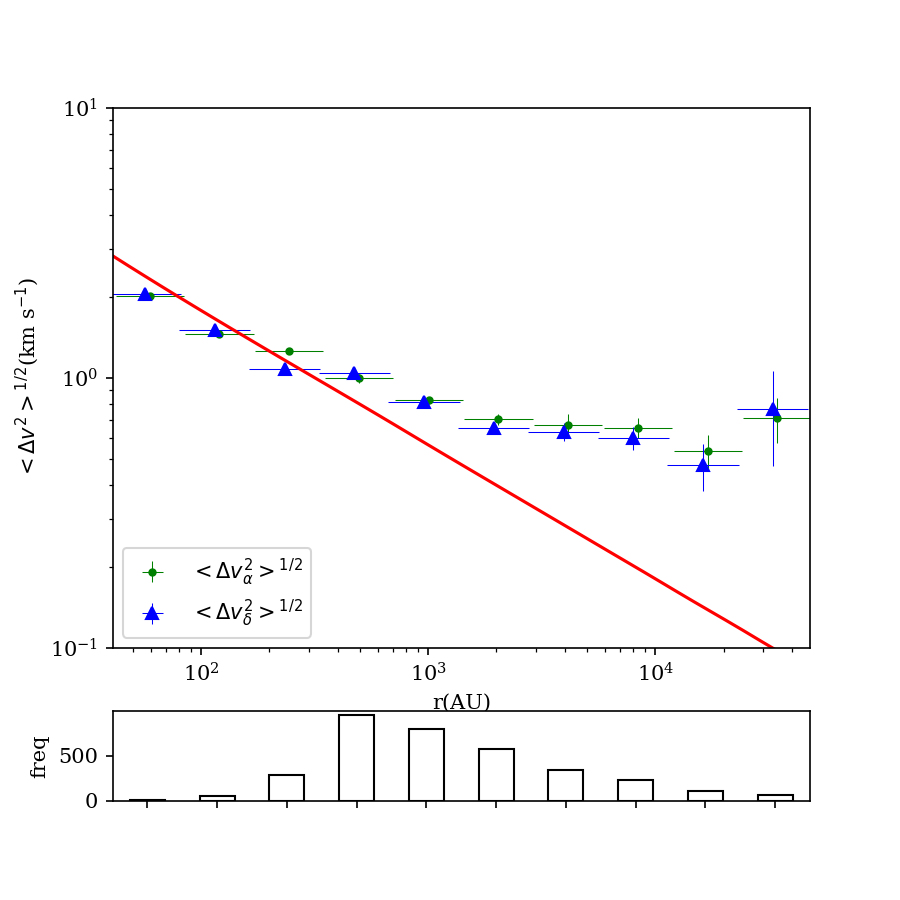

In [9]:
#COMPLETE SAMPLE TOTAL MASS

#subtab = tab.sort_values('tot_mass').iloc[0:5011].copy()
#subtab = tab.sort_values('tot_mass').iloc[5011:10022].copy()
#subtab = tab.sort_values('tot_mass').iloc[10022:15033].copy()
#subtab = tab.sort_values('tot_mass').iloc[15033:20044].copy()
#subtab = tab.sort_values('tot_mass').iloc[20044:25055].copy()
#subtab = tab.sort_values('tot_mass').iloc[25055:30066].copy()
#subtab = tab.sort_values('tot_mass').iloc[30066:].copy()
subtab = tab_single_color
rmin,rmax,step,sep,samp_ra,samp_dec,rms_ra,rms_ra_error,rms_dec,rms_dec_error,l =\
make_histogram_spherical(subtab,rmin=-3.7,rmax=False,rv_max=10,bins=10,poiss=False,
                         make_correction=True)

##Convert to AU
rmin += 5.31
rmax += 5.31
#step += 5.31
sep  += 5.31

print("rmin=",rmin,"rmax=",rmax)
fig,(a0,a1) = RMS_histogram(sep,samp_ra,step,rms_ra,rms_ra_error,rms_dec,rms_dec_error,
              save='',
              figname='',
              fnt=10,xlabl='r(AU)',ylabl='$<\Delta v^2>^{1/2}$(km s$^{-1}$)',
              _xmin=10**(rmin),
              _xmax=10**(rmax),
              _ymin=0.1,
              _ymax=10.,
              xsolid= 206000*rjacobi*10**(xspan),
              ysolid=Omega_g_rj*10**(f2(xspan)),
              showbins=False,
#              MONDline=7000/206000,
              MONDline=1E20,
              showlegend=True)

In [21]:
plt.subplots?

## Diagramas con RMS y H-R

In [20]:
#subtab = tab
#file_name = 'tab'
#subtab = tab_single
#file_name = 'tab_single'
#subtab = tab_color
#file_name = 'tab_color'
subtab = tab_single_color
file_name = 'tab_single_color'

rmin,rmax,step,sep,samp_ra,samp_dec,rms_ra,rms_ra_error,rms_dec,rms_dec_error,l =\
make_histogram_spherical(subtab,rmin=-3.7,rmax=False,rv_max=10,bins=10,poiss=False,
                         make_correction=True)

##Convert to AU
rmin += 5.31
rmax += 5.31
#step += 5.31
sep  += 5.31

<IPython.core.display.Javascript object>


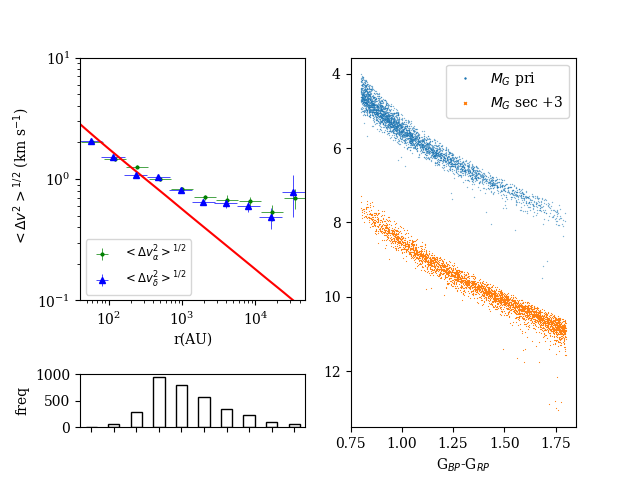

In [21]:
xsolid= 206000*rjacobi*10**(xspan)
ysolid=Omega_g_rj*10**(f2(xspan))

figname=''
fnt=10
xlabl='r(AU)'
#ylabl='$<\Delta v^2>^{1/2}$ (km s$^{-1}$)'
ylabl=' $<\Delta v^2>^{1/2}$ (km s$^{-1}$)'
_xmin=10**rmin
_xmax=10**rmax
_ymin=0.1
_ymax=10.
MONDline=7000

ax1a = plt.subplot2grid((6, 2), (0, 0), rowspan=4)
ax1b = plt.subplot2grid((6, 2), (5, 0))
ax2  = plt.subplot2grid((6, 2), (0, 1),rowspan=6)

ax1a.loglog()

ax1a.plot(xsolid,ysolid,'r')
ax1a.set_xlabel(xlabl,fontsize=fnt)
ax1a.set_ylabel(ylabl,fontsize=fnt)

ax1a.set_xlim(_xmin,_xmax)
ax1a.set_ylim(_ymin,_ymax)

ax1a.errorbar(10**(sep+0.01),rms_ra,
              rms_ra_error,
              (10**sep - 10**(sep-0.5*step),
               10**(sep+0.5*step) - 10**sep),
              fmt='g.',
              linewidth=0.5,
              ms=4,
              label=r'$<\Delta v_\alpha^2>^{1/2}$')

ax1a.errorbar(10**(sep-0.01),rms_dec,rms_dec_error,
             (10**sep - 10**(sep-0.5*step),
              10**(sep+0.5*step) - 10**(sep)),
              fmt='b^',
              linewidth=0.5,
              ms=4,
              label=r'$<\Delta v_\delta^2>^{1/2}$')

#ax1a.axvline(x=MONDline, ymin=_ymin, ymax=_ymax,
#             linestyle='--',linewidth=0.9)

ax1a.legend(loc='lower left',
            fontsize='small')

ax1b.set_ylabel('freq',fontsize=fnt)
ax1b.set_yscale('linear')
ax1b.set_xlim(np.log10(_xmin),np.log10(_xmax))

ax1b.bar(sep,samp_ra,width=step*0.5,
         color='white',edgecolor='black',tick_label='')

#Color magnitud
ax2.invert_yaxis()

ax2.set_xlabel('G$_{BP}$-G$_{RP}$',fontsize=fnt)
#ax2.set_ylabel('M$_G$',fontsize=fnt,labelpad=0)

ax2.plot(subtab.BP_RP1,subtab.G_abs1, 
         '+',ms=0.2, label='$M_G$ pri')
ax2.plot(subtab.BP_RP2,subtab.G_abs2 +3, 
         'x',ms=0.2, label='$M_G$ sec +3')
ax2.legend(markerscale=10)

#    ax1a.set_title(figname)

plt.savefig('rms_cmd//%s.png'%file_name)
#plt.savefig('rms_cmd//%s.jpg'%file_name)
plt.savefig('rms_cmd//%s.pdf'%file_name)
plt.savefig('rms_cmd//%s.ps'%file_name)


plt.show()

rmin= 1.6099999999999994 rmax= 4.698829526824358


<IPython.core.display.Javascript object>


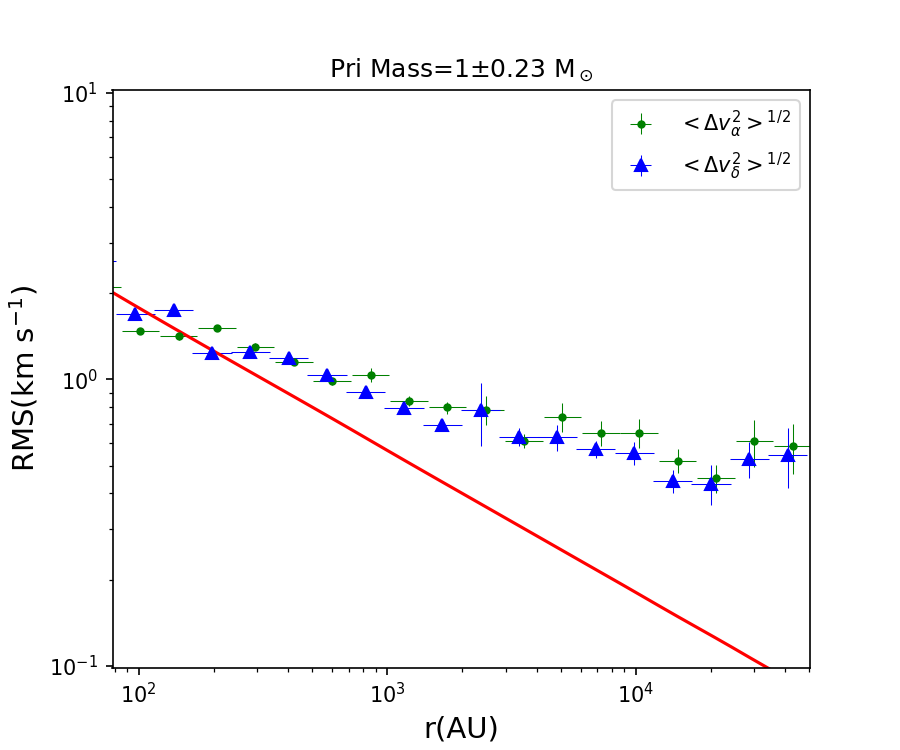

0

In [20]:
#subtab = tab[tab.mass_ratio > 1.5].sort_values('mass1').iloc[:4525].copy()
#subtab = tab[tab.mass_ratio > 1.5].sort_values('mass1').iloc[4525:9051].copy()
#subtab = tab[tab.mass_ratio > 1.5].sort_values('mass1').iloc[9051:13577].copy()
#subtab = tab[tab.mass_ratio > 1.5].sort_values('mass1').iloc[13577:].copy()

#subtab = tab[tab.mass_ratio <= 1.5].sort_values('mass1').iloc[:4246].copy()
#subtab = tab[tab.mass_ratio <= 1.5].sort_values('mass1').iloc[4246:8492].copy()
#subtab = tab[tab.mass_ratio <= 1.5].sort_values('mass1').iloc[8492:12738].copy()
subtab = tab[tab.mass_ratio <= 1.5].sort_values('mass1').iloc[12738:].copy()


rmin,rmax,step,sep,samp_ra,samp_dec,rms_ra,rms_ra_error,rms_dec,rms_dec_error,l =\
make_histogram_spherical(subtab,rmin=-3.7,rmax=False,rv_max=10,bins=20,poiss=False,
                         make_correction=True)

##Convert to AU
rmin += 5.31
rmax += 5.31
#step += 5.31
sep  += 5.31

print("rmin=",rmin,"rmax=",rmax)

RMS_histogram(sep,samp_ra,step,rms_ra,rms_ra_error,rms_dec,rms_dec_error,
              save='',
              figname='Pri Mass=%.2g$\pm$%.2f M$_\odot$'%(subtab.mass1.mean(),subtab.mass1.std()),
              fnt=14,xlabl='r(AU)',ylabl='RMS(km s$^{-1}$)',
              _xmin=10**(rmin),
              _xmax=10**(rmax),
              _ymin=0.1,
              _ymax=10.,
              xsolid= 206000*rjacobi*10**(xspan),
              ysolid=Omega_g_rj*10**(f2(xspan)),
              showbins=False,
#              MONDline=7000/206000,
              MONDline=1E20,
              showlegend=True)

In [ ]:
#subtab = tab[tab.mass_ratio > 1.5].sort_values('mass1').iloc[:4525].copy()
#subtab = tab[tab.mass_ratio > 1.5].sort_values('mass1').iloc[4525:9051].copy()
#subtab = tab[tab.mass_ratio > 1.5].sort_values('mass1').iloc[9051:13577].copy()
#subtab = tab[tab.mass_ratio > 1.5].sort_values('mass1').iloc[13577:].copy()

#subtab = tab[tab.mass_ratio <= 1.5].sort_values('mass1').iloc[:4246].copy()
#subtab = tab[tab.mass_ratio <= 1.5].sort_values('mass1').iloc[4246:8492].copy()
#subtab = tab[tab.mass_ratio <= 1.5].sort_values('mass1').iloc[8492:12738].copy()
#subtab = tab_single[tab_single.mass_ratio <= 1.5].sort_values('mass1').iloc[12738:].copy()

subtab = tab_single.sort_values('tot_mass').iloc[:5848].copy()

rmin,rmax,step,sep,samp_ra,samp_dec,rms_ra,rms_ra_error,rms_dec,rms_dec_error,l =\
make_histogram_spherical(subtab,rmin=-3.7,rmax=False,rv_max=10,bins=20,poiss=False,
                         make_correction=True)

##Convert to AU
rmin += 5.31
rmax += 5.31
#step += 5.31
sep  += 5.31


### ONLY SINGLES

In [10]:
xsolid= 206000*rjacobi*10**(xspan)
ysolid=Omega_g_rj*10**(f2(xspan))

figname=''
fnt=10
xlabl='r(AU)'
#ylabl='$<\Delta v^2>^{1/2}$ (km s$^{-1}$)'
ylabl=' $<\Delta v^2>^{1/2}$ (km s$^{-1}$)'
_xmin=10**rmin
_xmax=10**rmax
_ymin=0.1
_ymax=10.
MONDline=7000

plt.figure(figsize=(12,10),dpi=80)

ax1a = plt.subplot2grid((20, 3), (0, 0), rowspan=7)
ax1b = plt.subplot2grid((20, 3), (8, 0))

ax2a = plt.subplot2grid((20, 3), (0, 1), rowspan=7)
ax2b = plt.subplot2grid((20, 3), (8, 1))

ax3a = plt.subplot2grid((20, 3), (0, 2), rowspan=7)
ax3b = plt.subplot2grid((20, 3), (8, 2))

ax4a = plt.subplot2grid((20, 3), (10, 0), rowspan=7)
ax4b = plt.subplot2grid((20, 3), (18, 0))

ax5a = plt.subplot2grid((20, 3), (10, 1), rowspan=7)
ax5b = plt.subplot2grid((20, 3), (18, 1))

ax6a = plt.subplot2grid((20, 3), (10, 2), rowspan=7)
ax6b = plt.subplot2grid((20, 3), (18, 2))

###  PRIMER PLOT
subtab = tab_single.sort_values('tot_mass').iloc[:5848].copy()

rmin,rmax,step,sep,samp_ra,samp_dec,rms_ra,rms_ra_error,rms_dec,rms_dec_error,l =\
make_histogram_spherical(subtab,rmin=False,rmax=False,rv_max=10,bins=10,poiss=False,
                         make_correction=True)

##Convert to AU
rmin += 5.31
rmax += 5.31
#step += 5.31
sep  += 5.31

_xmin=10**rmin
_xmax=10**rmax


ax1a.text(7E2,7,'$M_{TOT}=$%.2f$\pm$%.2f$M_\odot$'%(subtab.tot_mass.mean(),subtab.tot_mass.std()))

ax1a.loglog()

ax1a.plot(xsolid,ysolid,'r')
ax1a.set_xlabel(xlabl,fontsize=fnt)
ax1a.set_ylabel(ylabl,fontsize=fnt)

ax1a.set_xlim(_xmin,_xmax)
ax1a.set_ylim(_ymin,_ymax)

ax1a.errorbar(10**(sep+0.01),rms_ra,
              rms_ra_error,
              (10**sep - 10**(sep-0.5*step),
               10**(sep+0.5*step) - 10**sep),
              fmt='g.',
              linewidth=0.5,
              ms=4,
              label=r'$<\Delta v_\alpha^2>^{1/2}$')

ax1a.errorbar(10**(sep-0.01),rms_dec,rms_dec_error,
             (10**sep - 10**(sep-0.5*step),
              10**(sep+0.5*step) - 10**(sep)),
              fmt='b^',
              linewidth=0.5,
              ms=4,
              label=r'$<\Delta v_\delta^2>^{1/2}$')

ax1a.legend(loc='lower left',
            fontsize='small')

ax1b.set_ylabel('freq',fontsize=fnt)
ax1b.set_yscale('linear')
ax1b.set_xlim(np.log10(_xmin),np.log10(_xmax))

ax1b.bar(sep,samp_ra,width=step*0.5,
         color='white',edgecolor='black',tick_label='')

#######################################################

###  SEGUNDO PLOT
subtab = tab_single.sort_values('tot_mass').iloc[5848:11696].copy()

rmin,rmax,step,sep,samp_ra,samp_dec,rms_ra,rms_ra_error,rms_dec,rms_dec_error,l =\
make_histogram_spherical(subtab,rmin=False,rmax=False,rv_max=10,bins=10,poiss=False,
                         make_correction=True)

##Convert to AU
rmin += 5.31
rmax += 5.31
#step += 5.31
sep  += 5.31

_xmin=10**rmin
_xmax=10**rmax


ax2a.text(7E2,7,'$M_{TOT}=$%.2f$\pm$%.2f$M_\odot$'%(subtab.tot_mass.mean(),subtab.tot_mass.std()))

ax2a.loglog()

ax2a.plot(xsolid,ysolid,'r')
ax2a.set_xlabel(xlabl,fontsize=fnt)
#ax2a.set_ylabel(ylabl,fontsize=fnt)

ax2a.set_xlim(_xmin,_xmax)
ax2a.set_ylim(_ymin,_ymax)

ax2a.errorbar(10**(sep+0.01),rms_ra,
              rms_ra_error,
              (10**sep - 10**(sep-0.5*step),
               10**(sep+0.5*step) - 10**sep),
              fmt='g.',
              linewidth=0.5,
              ms=4,
              label=r'$<\Delta v_\alpha^2>^{1/2}$')

ax2a.errorbar(10**(sep-0.01),rms_dec,rms_dec_error,
             (10**sep - 10**(sep-0.5*step),
              10**(sep+0.5*step) - 10**(sep)),
              fmt='b^',
              linewidth=0.5,
              ms=4,
              label=r'$<\Delta v_\delta^2>^{1/2}$')

ax2a.legend(loc='lower left',
            fontsize='small')

#ax2b.set_ylabel('freq',fontsize=fnt)
ax2b.set_yscale('linear')
ax2b.set_xlim(np.log10(_xmin),np.log10(_xmax))

ax2b.bar(sep,samp_ra,width=step*0.5,
         color='white',edgecolor='black',tick_label='')

#######################################################

###  TERCER PLOT
subtab = tab_single.sort_values('tot_mass').iloc[11696:17544].copy()

rmin,rmax,step,sep,samp_ra,samp_dec,rms_ra,rms_ra_error,rms_dec,rms_dec_error,l =\
make_histogram_spherical(subtab,rmin=False,rmax=False,rv_max=10,bins=10,poiss=False,
                         make_correction=True)

##Convert to AU
rmin += 5.31
rmax += 5.31
#step += 5.31
sep  += 5.31

_xmin=10**rmin
_xmax=10**rmax

ax3a.text(7E2,7,'$M_{TOT}=$%.2f$\pm$%.2f$M_\odot$'%(subtab.tot_mass.mean(),subtab.tot_mass.std()))

ax3a.loglog()

ax3a.plot(xsolid,ysolid,'r')
ax3a.set_xlabel(xlabl,fontsize=fnt)
#ax2a.set_ylabel(ylabl,fontsize=fnt)

ax3a.set_xlim(_xmin,_xmax)
ax3a.set_ylim(_ymin,_ymax)

ax3a.errorbar(10**(sep+0.01),rms_ra,
              rms_ra_error,
              (10**sep - 10**(sep-0.5*step),
               10**(sep+0.5*step) - 10**sep),
              fmt='g.',
              linewidth=0.5,
              ms=4,
              label=r'$<\Delta v_\alpha^2>^{1/2}$')

ax3a.errorbar(10**(sep-0.01),rms_dec,rms_dec_error,
             (10**sep - 10**(sep-0.5*step),
              10**(sep+0.5*step) - 10**(sep)),
              fmt='b^',
              linewidth=0.5,
              ms=4,
              label=r'$<\Delta v_\delta^2>^{1/2}$')

ax3a.legend(loc='lower left',
            fontsize='small')

#ax2b.set_ylabel('freq',fontsize=fnt)
ax3b.set_yscale('linear')
ax3b.set_xlim(np.log10(_xmin),np.log10(_xmax))

ax3b.bar(sep,samp_ra,width=step*0.5,
         color='white',edgecolor='black',tick_label='')

#######################################################


###  CUARTO PLOT
subtab = tab_single.sort_values('tot_mass').iloc[17544:23392].copy()

rmin,rmax,step,sep,samp_ra,samp_dec,rms_ra,rms_ra_error,rms_dec,rms_dec_error,l =\
make_histogram_spherical(subtab,rmin=False,rmax=False,rv_max=10,bins=10,poiss=False,
                         make_correction=True)

##Convert to AU
rmin += 5.31
rmax += 5.31
#step += 5.31
sep  += 5.31

_xmin=10**rmin
_xmax=10**rmax

ax4a.text(7E2,7,'$M_{TOT}=$%.2f$\pm$%.2f$M_\odot$'%(subtab.tot_mass.mean(),subtab.tot_mass.std()))

ax4a.loglog()

ax4a.plot(xsolid,ysolid,'r')
ax4a.set_xlabel(xlabl,fontsize=fnt)
ax4a.set_ylabel(ylabl,fontsize=fnt)

ax4a.set_xlim(_xmin,_xmax)
ax4a.set_ylim(_ymin,_ymax)

ax4a.errorbar(10**(sep+0.01),rms_ra,
              rms_ra_error,
              (10**sep - 10**(sep-0.5*step),
               10**(sep+0.5*step) - 10**sep),
              fmt='g.',
              linewidth=0.5,
              ms=4,
              label=r'$<\Delta v_\alpha^2>^{1/2}$')

ax4a.errorbar(10**(sep-0.01),rms_dec,rms_dec_error,
             (10**sep - 10**(sep-0.5*step),
              10**(sep+0.5*step) - 10**(sep)),
              fmt='b^',
              linewidth=0.5,
              ms=4,
              label=r'$<\Delta v_\delta^2>^{1/2}$')

ax4a.legend(loc='lower left',
            fontsize='small')

ax4b.set_ylabel('freq',fontsize=fnt)
ax4b.set_yscale('linear')
ax4b.set_xlim(np.log10(_xmin),np.log10(_xmax))

ax4b.bar(sep,samp_ra,width=step*0.5,
         color='white',edgecolor='black',tick_label='')

#######################################################

###  QUINTO PLOT
subtab = tab_single.sort_values('tot_mass').iloc[23392:29240].copy()

rmin,rmax,step,sep,samp_ra,samp_dec,rms_ra,rms_ra_error,rms_dec,rms_dec_error,l =\
make_histogram_spherical(subtab,rmin=False,rmax=False,rv_max=10,bins=10,poiss=False,
                         make_correction=True)

##Convert to AU
rmin += 5.31
rmax += 5.31
#step += 5.31
sep  += 5.31

_xmin=10**rmin
_xmax=10**rmax


ax5a.text(7E2,7,'$M_{TOT}=$%.2f$\pm$%.2f$M_\odot$'%(subtab.tot_mass.mean(),subtab.tot_mass.std()))

ax5a.loglog()

ax5a.plot(xsolid,ysolid,'r')
ax5a.set_xlabel(xlabl,fontsize=fnt)
#ax2a.set_ylabel(ylabl,fontsize=fnt)

ax5a.set_xlim(_xmin,_xmax)
ax5a.set_ylim(_ymin,_ymax)

ax5a.errorbar(10**(sep+0.01),rms_ra,
              rms_ra_error,
              (10**sep - 10**(sep-0.5*step),
               10**(sep+0.5*step) - 10**sep),
              fmt='g.',
              linewidth=0.5,
              ms=4,
              label=r'$<\Delta v_\alpha^2>^{1/2}$')

ax5a.errorbar(10**(sep-0.01),rms_dec,rms_dec_error,
             (10**sep - 10**(sep-0.5*step),
              10**(sep+0.5*step) - 10**(sep)),
              fmt='b^',
              linewidth=0.5,
              ms=4,
              label=r'$<\Delta v_\delta^2>^{1/2}$')

ax5a.legend(loc='lower left',
            fontsize='small')

#ax2b.set_ylabel('freq',fontsize=fnt)
ax5b.set_yscale('linear')
ax5b.set_xlim(np.log10(_xmin),np.log10(_xmax))

ax5b.bar(sep,samp_ra,width=step*0.5,
         color='white',edgecolor='black',tick_label='')

#######################################################

###  SEXTO PLOT
subtab = tab_single.sort_values('tot_mass').iloc[29240:].copy()

rmin,rmax,step,sep,samp_ra,samp_dec,rms_ra,rms_ra_error,rms_dec,rms_dec_error,l =\
make_histogram_spherical(subtab,rmin=False,rmax=False,rv_max=10,bins=10,poiss=False,
                         make_correction=True)

##Convert to AU
rmin += 5.31
rmax += 5.31
#step += 5.31
sep  += 5.31

_xmin=10**rmin
_xmax=10**rmax

ax6a.text(7E2,7,'$M_{TOT}=$%.2f$\pm$%.2f$M_\odot$'%(subtab.tot_mass.mean(),subtab.tot_mass.std()))

ax6a.loglog()

ax6a.plot(xsolid,ysolid,'r')
ax6a.set_xlabel(xlabl,fontsize=fnt)
#ax2a.set_ylabel(ylabl,fontsize=fnt)

ax6a.set_xlim(_xmin,_xmax)
ax6a.set_ylim(_ymin,_ymax)

ax6a.errorbar(10**(sep+0.01),rms_ra,
              rms_ra_error,
              (10**sep - 10**(sep-0.5*step),
               10**(sep+0.5*step) - 10**sep),
              fmt='g.',
              linewidth=0.5,
              ms=4,
              label=r'$<\Delta v_\alpha^2>^{1/2}$')

ax6a.errorbar(10**(sep-0.01),rms_dec,rms_dec_error,
             (10**sep - 10**(sep-0.5*step),
              10**(sep+0.5*step) - 10**(sep)),
              fmt='b^',
              linewidth=0.5,
              ms=4,
              label=r'$<\Delta v_\delta^2>^{1/2}$')

ax6a.legend(loc='lower left',
            fontsize='small')

#ax2b.set_ylabel('freq',fontsize=fnt)
ax6b.set_yscale('linear')
ax6b.set_xlim(np.log10(_xmin),np.log10(_xmax))

ax6b.bar(sep,samp_ra,width=step*0.5,
         color='white',edgecolor='black',tick_label='')

#######################################################

file_name='masatotal'
plt.savefig('%s.png'%file_name)
#plt.savefig('rms_cmd//%s.jpg'%file_name)
plt.savefig('%s.pdf'%file_name)
plt.savefig('%s.ps'%file_name)

plt.show()

NameError: name 'rmin' is not defined

In [59]:
#subtab = tab[tab.mass_ratio > 1.5].sort_values('mass1').iloc[:4525].copy()
#subtab = tab[tab.mass_ratio > 1.5].sort_values('mass1').iloc[4525:9051].copy()
#subtab = tab[tab.mass_ratio > 1.5].sort_values('mass1').iloc[9051:13577].copy()
#subtab = tab[tab.mass_ratio > 1.5].sort_values('mass1').iloc[13577:].copy()

#subtab = tab[tab.mass_ratio <= 1.5].sort_values('mass1').iloc[:4246].copy()
#subtab = tab[tab.mass_ratio <= 1.5].sort_values('mass1').iloc[4246:8492].copy()
#subtab = tab[tab.mass_ratio <= 1.5].sort_values('mass1').iloc[8492:12738].copy()
#subtab = tab_single[tab_single.mass_ratio <= 1.5].sort_values('mass1').iloc[12738:].copy()
subtab = tab_single[tab_single.mass_ratio < 1.5].sort_values('tot_mass').iloc[:4246].copy()
subtab = tab_single[tab_single.mass_ratio < 1.5].sort_values('tot_mass').iloc[4246:8492].copy()
subtab = tab_single[tab_single.mass_ratio < 1.5].sort_values('tot_mass').iloc[8492:12738].copy()
subtab = tab_single[tab_single.mass_ratio < 1.5].sort_values('mass1').iloc[12738:].copy()

16984

### SIMILAR MASSES Q > 0.66

<IPython.core.display.Javascript object>


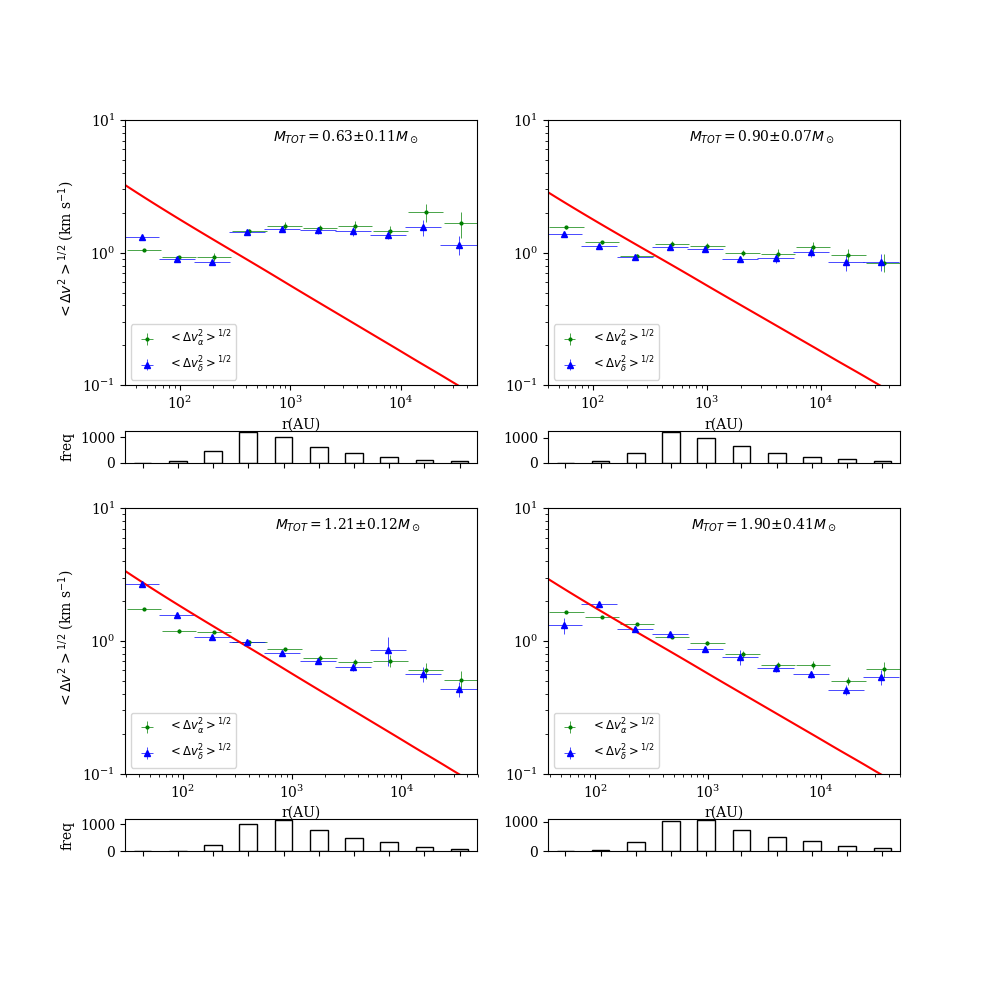

In [64]:
#### SIMILAR MASSES Q>0.66

xsolid= 206000*rjacobi*10**(xspan)
ysolid=Omega_g_rj*10**(f2(xspan))

figname=''
fnt=10
xlabl='r(AU)'
#ylabl='$<\Delta v^2>^{1/2}$ (km s$^{-1}$)'
ylabl=' $<\Delta v^2>^{1/2}$ (km s$^{-1}$)'
_xmin=10**rmin
_xmax=10**rmax
_ymin=0.1
_ymax=10.
MONDline=7000

plt.figure(figsize=(10,10),dpi=100)

ax1a = plt.subplot2grid((20, 2), (0, 0), rowspan=7)
ax1b = plt.subplot2grid((20, 2), (8, 0))

ax2a = plt.subplot2grid((20, 2), (0, 1), rowspan=7)
ax2b = plt.subplot2grid((20, 2), (8, 1))

ax3a = plt.subplot2grid((20, 2), (10, 0), rowspan=7)
ax3b = plt.subplot2grid((20, 2), (18, 0))

ax4a = plt.subplot2grid((20, 2), (10, 1), rowspan=7)
ax4b = plt.subplot2grid((20, 2), (18, 1))


###  PRIMER PLOT
subtab = tab_single[(tab_single.mass_ratio < 1.5)&
                    (tab_single.proy_sep_GDR2 > 3E1/206000)].sort_values('tot_mass').iloc[:4246].copy()

rmin,rmax,step,sep,samp_ra,samp_dec,rms_ra,rms_ra_error,rms_dec,rms_dec_error,l =\
make_histogram_spherical(subtab,rmin=False,rmax=False,rv_max=10,bins=10,poiss=False,
                         make_correction=True)

##Convert to AU
rmin += 5.31
rmax += 5.31
#step += 5.31
sep  += 5.31

_xmin=10**rmin
_xmax=10**rmax


ax1a.text(7E2,7,'$M_{TOT}=$%.2f$\pm$%.2f$M_\odot$'%(subtab.tot_mass.mean(),subtab.tot_mass.std()))

ax1a.loglog()

ax1a.plot(xsolid,ysolid,'r')
ax1a.set_xlabel(xlabl,fontsize=fnt)
ax1a.set_ylabel(ylabl,fontsize=fnt)

ax1a.set_xlim(_xmin,_xmax)
ax1a.set_ylim(_ymin,_ymax)

ax1a.errorbar(10**(sep+0.01),rms_ra,
              rms_ra_error,
              (10**sep - 10**(sep-0.5*step),
               10**(sep+0.5*step) - 10**sep),
              fmt='g.',
              linewidth=0.5,
              ms=4,
              label=r'$<\Delta v_\alpha^2>^{1/2}$')

ax1a.errorbar(10**(sep-0.01),rms_dec,rms_dec_error,
             (10**sep - 10**(sep-0.5*step),
              10**(sep+0.5*step) - 10**(sep)),
              fmt='b^',
              linewidth=0.5,
              ms=4,
              label=r'$<\Delta v_\delta^2>^{1/2}$')

ax1a.legend(loc='lower left',
            fontsize='small')

ax1b.set_ylabel('freq',fontsize=fnt)
ax1b.set_yscale('linear')
ax1b.set_xlim(np.log10(_xmin),np.log10(_xmax))

ax1b.bar(sep,samp_ra,width=step*0.5,
         color='white',edgecolor='black',tick_label='')

#######################################################

###  SEGUNDO PLOT

subtab = tab_single[tab_single.mass_ratio < 1.5].sort_values('tot_mass').iloc[4246:8492].copy()

rmin,rmax,step,sep,samp_ra,samp_dec,rms_ra,rms_ra_error,rms_dec,rms_dec_error,l =\
make_histogram_spherical(subtab,rmin=False,rmax=False,rv_max=10,bins=10,poiss=False,
                         make_correction=True)

##Convert to AU
rmin += 5.31
rmax += 5.31
#step += 5.31
sep  += 5.31

_xmin=10**rmin
_xmax=10**rmax


ax2a.text(7E2,7,'$M_{TOT}=$%.2f$\pm$%.2f$M_\odot$'%(subtab.tot_mass.mean(),subtab.tot_mass.std()))

ax2a.loglog()

ax2a.plot(xsolid,ysolid,'r')
ax2a.set_xlabel(xlabl,fontsize=fnt)
#ax2a.set_ylabel(ylabl,fontsize=fnt)

ax2a.set_xlim(_xmin,_xmax)
ax2a.set_ylim(_ymin,_ymax)

ax2a.errorbar(10**(sep+0.01),rms_ra,
              rms_ra_error,
              (10**sep - 10**(sep-0.5*step),
               10**(sep+0.5*step) - 10**sep),
              fmt='g.',
              linewidth=0.5,
              ms=4,
              label=r'$<\Delta v_\alpha^2>^{1/2}$')

ax2a.errorbar(10**(sep-0.01),rms_dec,rms_dec_error,
             (10**sep - 10**(sep-0.5*step),
              10**(sep+0.5*step) - 10**(sep)),
              fmt='b^',
              linewidth=0.5,
              ms=4,
              label=r'$<\Delta v_\delta^2>^{1/2}$')

ax2a.legend(loc='lower left',
            fontsize='small')

#ax2b.set_ylabel('freq',fontsize=fnt)
ax2b.set_yscale('linear')
ax2b.set_xlim(np.log10(_xmin),np.log10(_xmax))

ax2b.bar(sep,samp_ra,width=step*0.5,
         color='white',edgecolor='black',tick_label='')

#######################################################

###  TERCER PLOT

subtab = tab_single[tab_single.mass_ratio < 1.5].sort_values('tot_mass').iloc[8492:12738].copy()

rmin,rmax,step,sep,samp_ra,samp_dec,rms_ra,rms_ra_error,rms_dec,rms_dec_error,l =\
make_histogram_spherical(subtab,rmin=False,rmax=False,rv_max=10,bins=10,poiss=False,
                         make_correction=True)

##Convert to AU
rmin += 5.31
rmax += 5.31
#step += 5.31
sep  += 5.31

_xmin=10**rmin
_xmax=10**rmax

ax3a.text(7E2,7,'$M_{TOT}=$%.2f$\pm$%.2f$M_\odot$'%(subtab.tot_mass.mean(),subtab.tot_mass.std()))

ax3a.loglog()

ax3a.plot(xsolid,ysolid,'r')
ax3a.set_xlabel(xlabl,fontsize=fnt)
ax3a.set_ylabel(ylabl,fontsize=fnt)

ax3a.set_xlim(_xmin,_xmax)
ax3a.set_ylim(_ymin,_ymax)

ax3a.errorbar(10**(sep+0.01),rms_ra,
              rms_ra_error,
              (10**sep - 10**(sep-0.5*step),
               10**(sep+0.5*step) - 10**sep),
              fmt='g.',
              linewidth=0.5,
              ms=4,
              label=r'$<\Delta v_\alpha^2>^{1/2}$')

ax3a.errorbar(10**(sep-0.01),rms_dec,rms_dec_error,
             (10**sep - 10**(sep-0.5*step),
              10**(sep+0.5*step) - 10**(sep)),
              fmt='b^',
              linewidth=0.5,
              ms=4,
              label=r'$<\Delta v_\delta^2>^{1/2}$')

ax3a.legend(loc='lower left',
            fontsize='small')

ax3b.set_ylabel('freq',fontsize=fnt)
ax3b.set_yscale('linear')
ax3b.set_xlim(np.log10(_xmin),np.log10(_xmax))

ax3b.bar(sep,samp_ra,width=step*0.5,
         color='white',edgecolor='black',tick_label='')

#######################################################


###  CUARTO PLOT

subtab = tab_single[tab_single.mass_ratio < 1.5].sort_values('tot_mass').iloc[12738:].copy()

rmin,rmax,step,sep,samp_ra,samp_dec,rms_ra,rms_ra_error,rms_dec,rms_dec_error,l =\
make_histogram_spherical(subtab,rmin=False,rmax=False,rv_max=10,bins=10,poiss=False,
                         make_correction=True)

##Convert to AU
rmin += 5.31
rmax += 5.31
#step += 5.31
sep  += 5.31

_xmin=10**rmin
_xmax=10**rmax

ax4a.text(7E2,7,'$M_{TOT}=$%.2f$\pm$%.2f$M_\odot$'%(subtab.tot_mass.mean(),subtab.tot_mass.std()))

ax4a.loglog()

ax4a.plot(xsolid,ysolid,'r')
ax4a.set_xlabel(xlabl,fontsize=fnt)
#ax4a.set_ylabel(ylabl,fontsize=fnt)

ax4a.set_xlim(_xmin,_xmax)
ax4a.set_ylim(_ymin,_ymax)

ax4a.errorbar(10**(sep+0.01),rms_ra,
              rms_ra_error,
              (10**sep - 10**(sep-0.5*step),
               10**(sep+0.5*step) - 10**sep),
              fmt='g.',
              linewidth=0.5,
              ms=4,
              label=r'$<\Delta v_\alpha^2>^{1/2}$')

ax4a.errorbar(10**(sep-0.01),rms_dec,rms_dec_error,
             (10**sep - 10**(sep-0.5*step),
              10**(sep+0.5*step) - 10**(sep)),
              fmt='b^',
              linewidth=0.5,
              ms=4,
              label=r'$<\Delta v_\delta^2>^{1/2}$')

ax4a.legend(loc='lower left',
            fontsize='small')

#ax4b.set_ylabel('freq',fontsize=fnt)
ax4b.set_yscale('linear')
ax4b.set_xlim(np.log10(_xmin),np.log10(_xmax))

ax4b.bar(sep,samp_ra,width=step*0.5,
         color='white',edgecolor='black',tick_label='')

#######################################################

file_name='masasiguales'
plt.savefig('%s.png'%file_name)
#plt.savefig('rms_cmd//%s.jpg'%file_name)
plt.savefig('%s.pdf'%file_name)
plt.savefig('%s.ps'%file_name)

plt.show()

### DIFFERENT MASSES Q < 0.66

<IPython.core.display.Javascript object>


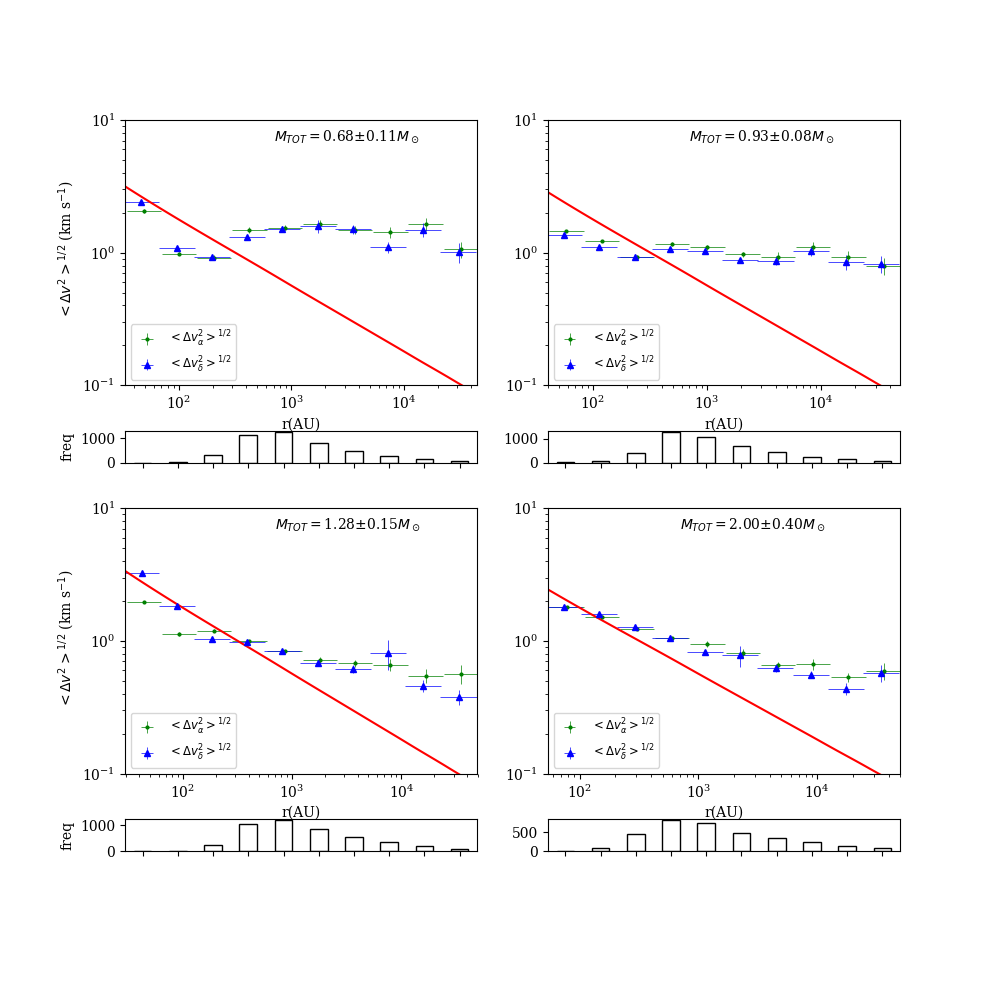

In [65]:
#### DIFFERENT MASSES Q>1.5

xsolid= 206000*rjacobi*10**(xspan)
ysolid=Omega_g_rj*10**(f2(xspan))

figname=''
fnt=10
xlabl='r(AU)'
#ylabl='$<\Delta v^2>^{1/2}$ (km s$^{-1}$)'
ylabl=' $<\Delta v^2>^{1/2}$ (km s$^{-1}$)'
_xmin=10**rmin
_xmax=10**rmax
_ymin=0.1
_ymax=10.
MONDline=7000

plt.figure(figsize=(10,10),dpi=100)

ax1a = plt.subplot2grid((20, 2), (0, 0), rowspan=7)
ax1b = plt.subplot2grid((20, 2), (8, 0))

ax2a = plt.subplot2grid((20, 2), (0, 1), rowspan=7)
ax2b = plt.subplot2grid((20, 2), (8, 1))

ax3a = plt.subplot2grid((20, 2), (10, 0), rowspan=7)
ax3b = plt.subplot2grid((20, 2), (18, 0))

ax4a = plt.subplot2grid((20, 2), (10, 1), rowspan=7)
ax4b = plt.subplot2grid((20, 2), (18, 1))


###  PRIMER PLOT
subtab = tab_single[(tab_single.mass_ratio > 1.5) &
#                    (tab_single.proy_sep_GDR2 > 3E1/206000) &
                    True].sort_values('tot_mass').iloc[:4526].copy()

rmin,rmax,step,sep,samp_ra,samp_dec,rms_ra,rms_ra_error,rms_dec,rms_dec_error,l =\
make_histogram_spherical(subtab,rmin=False,rmax=False,rv_max=10,bins=10,poiss=False,
                         make_correction=True)

##Convert to AU
rmin += 5.31
rmax += 5.31
#step += 5.31
sep  += 5.31

_xmin=10**rmin
_xmax=10**rmax


ax1a.text(7E2,7,'$M_{TOT}=$%.2f$\pm$%.2f$M_\odot$'%(subtab.tot_mass.mean(),subtab.tot_mass.std()))

ax1a.loglog()

ax1a.plot(xsolid,ysolid,'r')
ax1a.set_xlabel(xlabl,fontsize=fnt)
ax1a.set_ylabel(ylabl,fontsize=fnt)

ax1a.set_xlim(_xmin,_xmax)
ax1a.set_ylim(_ymin,_ymax)

ax1a.errorbar(10**(sep+0.01),rms_ra,
              rms_ra_error,
              (10**sep - 10**(sep-0.5*step),
               10**(sep+0.5*step) - 10**sep),
              fmt='g.',
              linewidth=0.5,
              ms=4,
              label=r'$<\Delta v_\alpha^2>^{1/2}$')

ax1a.errorbar(10**(sep-0.01),rms_dec,rms_dec_error,
             (10**sep - 10**(sep-0.5*step),
              10**(sep+0.5*step) - 10**(sep)),
              fmt='b^',
              linewidth=0.5,
              ms=4,
              label=r'$<\Delta v_\delta^2>^{1/2}$')

ax1a.legend(loc='lower left',
            fontsize='small')

ax1b.set_ylabel('freq',fontsize=fnt)
ax1b.set_yscale('linear')
ax1b.set_xlim(np.log10(_xmin),np.log10(_xmax))

ax1b.bar(sep,samp_ra,width=step*0.5,
         color='white',edgecolor='black',tick_label='')

#######################################################

###  SEGUNDO PLOT

subtab = tab_single[tab_single.mass_ratio < 1.5].sort_values('tot_mass').iloc[4526:9052].copy()

rmin,rmax,step,sep,samp_ra,samp_dec,rms_ra,rms_ra_error,rms_dec,rms_dec_error,l =\
make_histogram_spherical(subtab,rmin=False,rmax=False,rv_max=10,bins=10,poiss=False,
                         make_correction=True)

##Convert to AU
rmin += 5.31
rmax += 5.31
#step += 5.31
sep  += 5.31

_xmin=10**rmin
_xmax=10**rmax


ax2a.text(7E2,7,'$M_{TOT}=$%.2f$\pm$%.2f$M_\odot$'%(subtab.tot_mass.mean(),subtab.tot_mass.std()))

ax2a.loglog()

ax2a.plot(xsolid,ysolid,'r')
ax2a.set_xlabel(xlabl,fontsize=fnt)
#ax2a.set_ylabel(ylabl,fontsize=fnt)

ax2a.set_xlim(_xmin,_xmax)
ax2a.set_ylim(_ymin,_ymax)

ax2a.errorbar(10**(sep+0.01),rms_ra,
              rms_ra_error,
              (10**sep - 10**(sep-0.5*step),
               10**(sep+0.5*step) - 10**sep),
              fmt='g.',
              linewidth=0.5,
              ms=4,
              label=r'$<\Delta v_\alpha^2>^{1/2}$')

ax2a.errorbar(10**(sep-0.01),rms_dec,rms_dec_error,
             (10**sep - 10**(sep-0.5*step),
              10**(sep+0.5*step) - 10**(sep)),
              fmt='b^',
              linewidth=0.5,
              ms=4,
              label=r'$<\Delta v_\delta^2>^{1/2}$')

ax2a.legend(loc='lower left',
            fontsize='small')

#ax2b.set_ylabel('freq',fontsize=fnt)
ax2b.set_yscale('linear')
ax2b.set_xlim(np.log10(_xmin),np.log10(_xmax))

ax2b.bar(sep,samp_ra,width=step*0.5,
         color='white',edgecolor='black',tick_label='')

#######################################################

###  TERCER PLOT

subtab = tab_single[tab_single.mass_ratio < 1.5].sort_values('tot_mass').iloc[9052:13578].copy()

rmin,rmax,step,sep,samp_ra,samp_dec,rms_ra,rms_ra_error,rms_dec,rms_dec_error,l =\
make_histogram_spherical(subtab,rmin=False,rmax=False,rv_max=10,bins=10,poiss=False,
                         make_correction=True)

##Convert to AU
rmin += 5.31
rmax += 5.31
#step += 5.31
sep  += 5.31

_xmin=10**rmin
_xmax=10**rmax

ax3a.text(7E2,7,'$M_{TOT}=$%.2f$\pm$%.2f$M_\odot$'%(subtab.tot_mass.mean(),subtab.tot_mass.std()))

ax3a.loglog()

ax3a.plot(xsolid,ysolid,'r')
ax3a.set_xlabel(xlabl,fontsize=fnt)
ax3a.set_ylabel(ylabl,fontsize=fnt)

ax3a.set_xlim(_xmin,_xmax)
ax3a.set_ylim(_ymin,_ymax)

ax3a.errorbar(10**(sep+0.01),rms_ra,
              rms_ra_error,
              (10**sep - 10**(sep-0.5*step),
               10**(sep+0.5*step) - 10**sep),
              fmt='g.',
              linewidth=0.5,
              ms=4,
              label=r'$<\Delta v_\alpha^2>^{1/2}$')

ax3a.errorbar(10**(sep-0.01),rms_dec,rms_dec_error,
             (10**sep - 10**(sep-0.5*step),
              10**(sep+0.5*step) - 10**(sep)),
              fmt='b^',
              linewidth=0.5,
              ms=4,
              label=r'$<\Delta v_\delta^2>^{1/2}$')

ax3a.legend(loc='lower left',
            fontsize='small')

ax3b.set_ylabel('freq',fontsize=fnt)
ax3b.set_yscale('linear')
ax3b.set_xlim(np.log10(_xmin),np.log10(_xmax))

ax3b.bar(sep,samp_ra,width=step*0.5,
         color='white',edgecolor='black',tick_label='')

#######################################################


###  CUARTO PLOT

subtab = tab_single[tab_single.mass_ratio < 1.5].sort_values('tot_mass').iloc[13578:].copy()

rmin,rmax,step,sep,samp_ra,samp_dec,rms_ra,rms_ra_error,rms_dec,rms_dec_error,l =\
make_histogram_spherical(subtab,rmin=False,rmax=False,rv_max=10,bins=10,poiss=False,
                         make_correction=True)

##Convert to AU
rmin += 5.31
rmax += 5.31
#step += 5.31
sep  += 5.31

_xmin=10**rmin
_xmax=10**rmax

ax4a.text(7E2,7,'$M_{TOT}=$%.2f$\pm$%.2f$M_\odot$'%(subtab.tot_mass.mean(),subtab.tot_mass.std()))

ax4a.loglog()

ax4a.plot(xsolid,ysolid,'r')
ax4a.set_xlabel(xlabl,fontsize=fnt)
#ax4a.set_ylabel(ylabl,fontsize=fnt)

ax4a.set_xlim(_xmin,_xmax)
ax4a.set_ylim(_ymin,_ymax)

ax4a.errorbar(10**(sep+0.01),rms_ra,
              rms_ra_error,
              (10**sep - 10**(sep-0.5*step),
               10**(sep+0.5*step) - 10**sep),
              fmt='g.',
              linewidth=0.5,
              ms=4,
              label=r'$<\Delta v_\alpha^2>^{1/2}$')

ax4a.errorbar(10**(sep-0.01),rms_dec,rms_dec_error,
             (10**sep - 10**(sep-0.5*step),
              10**(sep+0.5*step) - 10**(sep)),
              fmt='b^',
              linewidth=0.5,
              ms=4,
              label=r'$<\Delta v_\delta^2>^{1/2}$')

ax4a.legend(loc='lower left',
            fontsize='small')

#ax4b.set_ylabel('freq',fontsize=fnt)
ax4b.set_yscale('linear')
ax4b.set_xlim(np.log10(_xmin),np.log10(_xmax))

ax4b.bar(sep,samp_ra,width=step*0.5,
         color='white',edgecolor='black',tick_label='')

#######################################################

file_name='masasdistintas'
plt.savefig('%s.png'%file_name)
#plt.savefig('rms_cmd//%s.jpg'%file_name)
plt.savefig('%s.pdf'%file_name)
plt.savefig('%s.ps'%file_name)

plt.show()

rmin= -2.313406403546832 rmax= 0.8770280310916052


<IPython.core.display.Javascript object>


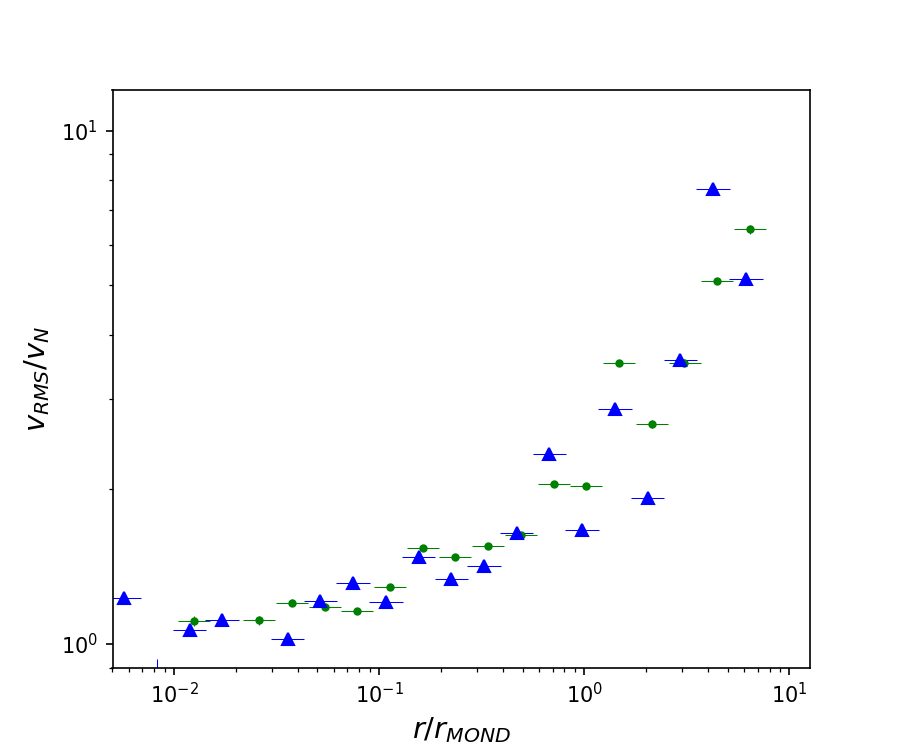

0

In [34]:
subtab = tab_color
rmin,rmax,step,sep,samp_ra,rms_ra,rms_ra_error =\
RMS_histogram_1D(subtab,rmin=False,rmax=False,bins=20,poiss=False,mc=False, N=999,
                     seplabel='rmondian',vellabel='velq_ra',velerrlabel='dv_ra_err')
rmin,rmax,step,sep,samp_dec,rms_dec,rms_dec_error =\
RMS_histogram_1D(subtab,rmin=False,rmax=False,bins=20,poiss=False,mc=False, N=999,
                     seplabel='rmondian',vellabel='velq_dec',velerrlabel='dv_dec_err')
print("rmin=",rmin,"rmax=",rmax)
RMS_histogram(sep,samp_ra,step,rms_ra,rms_ra_error,rms_dec,rms_dec_error,
              save='',figname='',
              fnt=14,xlabl='$r/r_{MOND}$',ylabl='$v_{RMS}/v_{N}$',
              _xmin=10**(-2.3),
              _xmax=10**(1.1),
              _ymin=0.9,
              _ymax=12.,
#              xsolid=rjacobi*10**(xspan),
#              ysolid=Omega_g_rj*10**(f2(xspan)),
              showbins=False,
              MONDline=1E20,
              showlegend=False)

## ONLY SINGLES WITH COLOR

In [11]:
len(tab_single_color)

3425

### 6 cortes

In [8]:
xsolid= 206000*rjacobi*10**(xspan)
ysolid=Omega_g_rj*10**(f2(xspan))

figname=''
fnt=10
#_xmin=10**rmin
#_xmax=10**rmax

xlabl='r(AU)'
#ylabl='$<\Delta v^2>^{1/2}$ (km s$^{-1}$)'
ylabl=' $<\Delta v^2>^{1/2}$ (km s$^{-1}$)'
_ymin=0.1
_ymax=10.
MONDline=7000

plt.figure(figsize=(12,10),dpi=80)

ax1a = plt.subplot2grid((20, 3), (0, 0), rowspan=9)
#ax1b = plt.subplot2grid((20, 3), (8, 0))

ax2a = plt.subplot2grid((20, 3), (0, 1), rowspan=9)
#ax2b = plt.subplot2grid((20, 3), (8, 1))

ax3a = plt.subplot2grid((20, 3), (0, 2), rowspan=9)
#ax3b = plt.subplot2grid((20, 3), (8, 2))

ax4a = plt.subplot2grid((20, 3), (10, 0), rowspan=9)
#ax4b = plt.subplot2grid((20, 3), (18, 0))

ax5a = plt.subplot2grid((20, 3), (10, 1), rowspan=9)
#ax5b = plt.subplot2grid((20, 3), (18, 1))

ax6a = plt.subplot2grid((20, 3), (10, 2), rowspan=9)
#ax6b = plt.subplot2grid((20, 3), (18, 2))

#Caracteristicas de la tabla
axn = 6
span = len(tab_single_color)//axn

#axioms = [(ax1a,ax1b),(ax2a,ax2b),(ax3a,ax3b),
#          (ax4a,ax4b),(ax5a,ax5b),(ax6a,ax6b)]

axioms = [(ax1a,0,'',ylabl),(ax2a,0,'',''),(ax3a,0,'',''),
          (ax4a,0,xlabl,ylabl),(ax5a,0,xlabl,''),(ax6a,0,xlabl,'')]

for i in range(axn):
    
    if i < axn-1:
        subtab = tab_single_color.sort_values('tot_mass').iloc[(i*span):((i+1)*span)].copy()
    else:
        subtab = tab_single_color.sort_values('tot_mass').iloc[(i*span):].copy()
        
    rmin,rmax,step,sep,samp_ra,samp_dec,rms_ra,rms_ra_error,rms_dec,rms_dec_error,l =\
    make_histogram_spherical(subtab,rmin=False,rmax=False,rv_max=10,bins=10,poiss=False,
                             make_correction=True)
    
    ##Convert to AU
    rmin += 5.31
    rmax += 5.31
    #step += 5.31
    sep  += 5.31
    
    _xmin=10**rmin
    _xmax=10**rmax
    
    axioms[i][0].text(10**(0.5*(rmin+rmax)),_ymax-3,'$M_{TOT}=$%.2f$\pm$%.2f$M_\odot$'%(subtab.tot_mass.mean(),subtab.tot_mass.std()),
                      fontsize=fnt+2, horizontalalignment='center')
    axioms[i][0].loglog()
    
    axioms[i][0].plot(xsolid,ysolid,'r')
    axioms[i][0].set_xlabel(axioms[i][2],fontsize=fnt)
    
    axioms[i][0].set_ylabel(axioms[i][3],fontsize=fnt)
    
    axioms[i][0].set_xlim(_xmin,_xmax)
    axioms[i][0].set_ylim(_ymin,_ymax)
    
    axioms[i][0].errorbar(10**(sep+0.01),rms_ra,
                          rms_ra_error,
                          (10**sep - 10**(sep-0.5*step),
                           10**(sep+0.5*step) - 10**sep),
                          fmt='g.',
                          linewidth=0.5,
                          ms=4,
                          label=r'$<\Delta v_\alpha^2>^{1/2}$')
    
    axioms[i][0].errorbar(10**(sep-0.01),rms_dec,rms_dec_error,
                          (10**sep - 10**(sep-0.5*step),
                           10**(sep+0.5*step) - 10**(sep)),
                          fmt='b^',
                          linewidth=0.5,
                          ms=4,
                          label=r'$<\Delta v_\delta^2>^{1/2}$')

    axioms[i][0].legend(loc='lower left',
                        fontsize='small')
    
#    axioms[i][1].set_ylabel('freq',fontsize=fnt)
#    axioms[i][1].set_yscale('linear')
#    axioms[i][1].set_xlim(np.log10(_xmin),np.log10(_xmax))   
#    axioms[i][1].bar(sep,samp_ra,width=step*0.5,
#                     color='white',edgecolor='black',tick_label='')

#######################################################

file_name='masatotal_color_6'
if True:
    plt.savefig('%s.png'%file_name)
    #plt.savefig('rms_cmd//%s.jpg'%file_name)
    plt.savefig('%s.pdf'%file_name)
    plt.savefig('%s.ps'%file_name)
plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

/home/lupido/MEGAsync/Documentos/ASTRO/Doctorado/2o_semestre/CANARIAS_GAIA/ElBadry-Rix/binaries.py:488: RuntimeWarning: Mean of empty slice.
  (np.random.normal(_temp[vellabel],_temp[velerrlabel])**2).mean()))
/home/lupido/.local/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transpar

### 4 cortes

/home/rcortes/MEGA/MEGAsync/Documentos/ASTRO/Doctorado/2o_semestre/CANARIAS_GAIA/ElBadry-Rix/binaries.py:488: RuntimeWarning: Mean of empty slice.
  (np.random.normal(_temp[vellabel],_temp[velerrlabel])**2).mean()))
/home/rcortes/.local/lib/python3.6/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially t

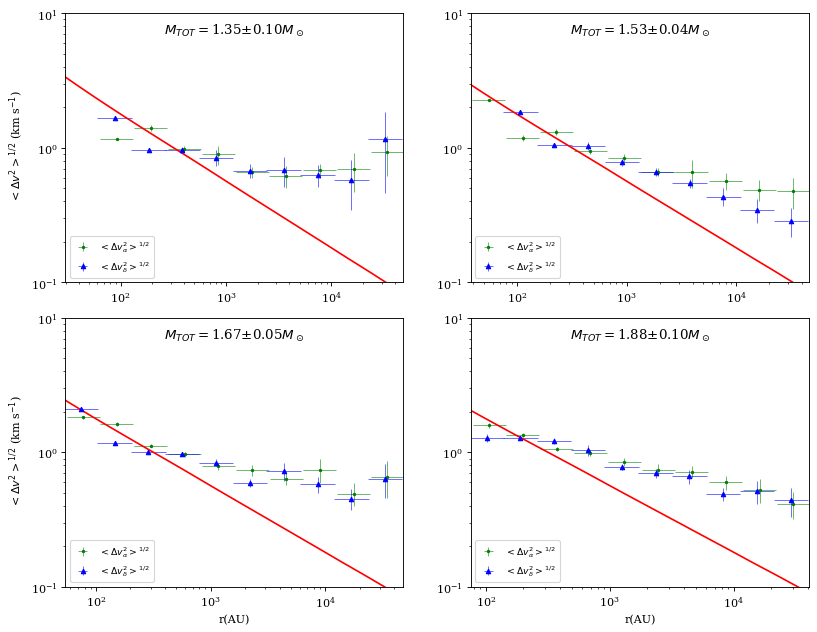

In [22]:
xsolid= 206000*rjacobi*10**(xspan)
ysolid=Omega_g_rj*10**(f2(xspan))

figname=''
fnt=10
#_xmin=10**rmin
#_xmax=10**rmax

xlabl='r(AU)'
#ylabl='$<\Delta v^2>^{1/2}$ (km s$^{-1}$)'
ylabl=' $<\Delta v^2>^{1/2}$ (km s$^{-1}$)'
_ymin=0.1
_ymax=10.
MONDline=7000

plt.figure(figsize=(12,10),dpi=80)

ax1a = plt.subplot2grid((20, 2), (0, 0), rowspan=9)
#ax1b = plt.subplot2grid((20, 3), (8, 0))

ax2a = plt.subplot2grid((20, 2), (0, 1), rowspan=9)
#ax2b = plt.subplot2grid((20, 3), (8, 1))

ax3a = plt.subplot2grid((20, 2), (10, 0), rowspan=9)
#ax3b = plt.subplot2grid((20, 3), (8, 2))

ax4a = plt.subplot2grid((20, 2), (10, 1), rowspan=9)
#ax4b = plt.subplot2grid((20, 3), (18, 0))

#Caracteristicas de la tabla
axn = 4
span = len(tab_single_color)//axn

#axioms = [(ax1a,ax1b),(ax2a,ax2b),(ax3a,ax3b),
#          (ax4a,ax4b),(ax5a,ax5b),(ax6a,ax6b)]

axioms = [(ax1a,0,'',ylabl),(ax2a,0,'',''),
          (ax3a,0,xlabl,ylabl),(ax4a,0,xlabl,'')]

for i in range(axn):
    
    if i < axn-1:
        subtab = tab_single_color.sort_values('tot_mass').iloc[(i*span):((i+1)*span)].copy()
    else:
        subtab = tab_single_color.sort_values('tot_mass').iloc[(i*span):].copy()
        
    rmin,rmax,step,sep,samp_ra,samp_dec,rms_ra,rms_ra_error,rms_dec,rms_dec_error,l =\
    make_histogram_spherical(subtab,rmin=False,rmax=False,rv_max=10,bins=10,poiss=False,
                             make_correction=True)
    
    ##Convert to AU
    rmin += 5.31
    rmax += 5.31
    #step += 5.31
    sep  += 5.31
    
    _xmin=10**rmin
    _xmax=10**rmax
    
    axioms[i][0].text(10**(0.5*(rmin+rmax)),_ymax-3,'$M_{TOT}=$%.2f$\pm$%.2f$M_\odot$'%(subtab.tot_mass.mean(),subtab.tot_mass.std()),
                      fontsize=fnt+2, horizontalalignment='center')
    axioms[i][0].loglog()
    
    axioms[i][0].plot(xsolid,ysolid,'r')
    axioms[i][0].set_xlabel(axioms[i][2],fontsize=fnt)
    
    axioms[i][0].set_ylabel(axioms[i][3],fontsize=fnt)
    
    axioms[i][0].set_xlim(_xmin,_xmax)
    axioms[i][0].set_ylim(_ymin,_ymax)
    
    axioms[i][0].errorbar(10**(sep+0.01),rms_ra,
                          rms_ra_error,
                          (10**sep - 10**(sep-0.5*step),
                           10**(sep+0.5*step) - 10**sep),
                          fmt='g.',
                          linewidth=0.5,
                          ms=4,
                          label=r'$<\Delta v_\alpha^2>^{1/2}$')
    
    axioms[i][0].errorbar(10**(sep-0.01),rms_dec,rms_dec_error,
                          (10**sep - 10**(sep-0.5*step),
                           10**(sep+0.5*step) - 10**(sep)),
                          fmt='b^',
                          linewidth=0.5,
                          ms=4,
                          label=r'$<\Delta v_\delta^2>^{1/2}$')

    axioms[i][0].legend(loc='lower left',
                        fontsize='small')
    
#    axioms[i][1].set_ylabel('freq',fontsize=fnt)
#    axioms[i][1].set_yscale('linear')
#    axioms[i][1].set_xlim(np.log10(_xmin),np.log10(_xmax))   
#    axioms[i][1].bar(sep,samp_ra,width=step*0.5,
#                     color='white',edgecolor='black',tick_label='')

#######################################################

file_name='masatotal_color_4'
if True:
    plt.savefig('%s.png'%file_name)
    #plt.savefig('rms_cmd//%s.jpg'%file_name)
    plt.savefig('%s.pdf'%file_name)
    plt.savefig('%s.ps'%file_name)
plt.show()

### SIMILAR MASSES Q>0.66

/home/rcortes/MEGA/MEGAsync/Documentos/ASTRO/Doctorado/2o_semestre/CANARIAS_GAIA/ElBadry-Rix/binaries.py:488: RuntimeWarning: Mean of empty slice.
  (np.random.normal(_temp[vellabel],_temp[velerrlabel])**2).mean()))
/home/rcortes/.local/lib/python3.6/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially t

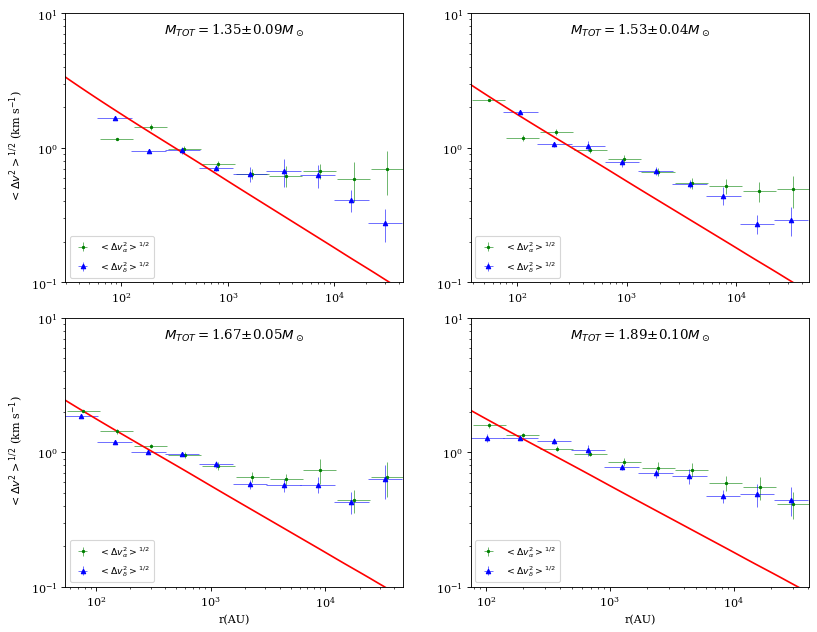

In [37]:
xsolid= 206000*rjacobi*10**(xspan)
ysolid=Omega_g_rj*10**(f2(xspan))

figname=''
fnt=10
#_xmin=10**rmin
#_xmax=10**rmax

xlabl='r(AU)'
#ylabl='$<\Delta v^2>^{1/2}$ (km s$^{-1}$)'
ylabl=' $<\Delta v^2>^{1/2}$ (km s$^{-1}$)'
_ymin=0.1
_ymax=10.
MONDline=7000

plt.figure(figsize=(12,10),dpi=80)

ax1a = plt.subplot2grid((20, 2), (0, 0), rowspan=9)
#ax1b = plt.subplot2grid((20, 3), (8, 0))

ax2a = plt.subplot2grid((20, 2), (0, 1), rowspan=9)
#ax2b = plt.subplot2grid((20, 3), (8, 1))

ax3a = plt.subplot2grid((20, 2), (10, 0), rowspan=9)
#ax3b = plt.subplot2grid((20, 3), (8, 2))

ax4a = plt.subplot2grid((20, 2), (10, 1), rowspan=9)
#ax4b = plt.subplot2grid((20, 3), (18, 0))

#Caracteristicas de la tabla
axn = 4
tablita = tab_single_color[1/tab_single_color.mass_ratio > 0.66]
span = len(tablita)//axn

#axioms = [(ax1a,ax1b),(ax2a,ax2b),(ax3a,ax3b),
#          (ax4a,ax4b),(ax5a,ax5b),(ax6a,ax6b)]

axioms = [(ax1a,0,'',ylabl),(ax2a,0,'',''),
          (ax3a,0,xlabl,ylabl),(ax4a,0,xlabl,'')]

for i in range(axn):
    
    if i < axn-1:
        subtab = tablita.sort_values('tot_mass').iloc[(i*span):((i+1)*span)].copy()
    else:
        subtab = tablita.sort_values('tot_mass').iloc[(i*span):].copy()
        
    rmin,rmax,step,sep,samp_ra,samp_dec,rms_ra,rms_ra_error,rms_dec,rms_dec_error,l =\
    make_histogram_spherical(subtab,rmin=False,rmax=False,rv_max=10,bins=10,poiss=False,
                             make_correction=True)
    
    ##Convert to AU
    rmin += 5.31
    rmax += 5.31
    #step += 5.31
    sep  += 5.31
    
    _xmin=10**rmin
    _xmax=10**rmax
    
    axioms[i][0].text(10**(0.5*(rmin+rmax)),_ymax-3,'$M_{TOT}=$%.2f$\pm$%.2f$M_\odot$'%(subtab.tot_mass.mean(),subtab.tot_mass.std()),
                      fontsize=fnt+2, horizontalalignment='center')
    axioms[i][0].loglog()
    
    axioms[i][0].plot(xsolid,ysolid,'r')
    axioms[i][0].set_xlabel(axioms[i][2],fontsize=fnt)
    
    axioms[i][0].set_ylabel(axioms[i][3],fontsize=fnt)
    
    axioms[i][0].set_xlim(_xmin,_xmax)
    axioms[i][0].set_ylim(_ymin,_ymax)
    
    axioms[i][0].errorbar(10**(sep+0.01),rms_ra,
                          rms_ra_error,
                          (10**sep - 10**(sep-0.5*step),
                           10**(sep+0.5*step) - 10**sep),
                          fmt='g.',
                          linewidth=0.5,
                          ms=4,
                          label=r'$<\Delta v_\alpha^2>^{1/2}$')
    
    axioms[i][0].errorbar(10**(sep-0.01),rms_dec,rms_dec_error,
                          (10**sep - 10**(sep-0.5*step),
                           10**(sep+0.5*step) - 10**(sep)),
                          fmt='b^',
                          linewidth=0.5,
                          ms=4,
                          label=r'$<\Delta v_\delta^2>^{1/2}$')

    axioms[i][0].legend(loc='lower left',
                        fontsize='small')
    
#    axioms[i][1].set_ylabel('freq',fontsize=fnt)
#    axioms[i][1].set_yscale('linear')
#    axioms[i][1].set_xlim(np.log10(_xmin),np.log10(_xmax))   
#    axioms[i][1].bar(sep,samp_ra,width=step*0.5,
#                     color='white',edgecolor='black',tick_label='')

#######################################################

file_name='masasiguales_color_4'
if True:
    plt.savefig('%s.png'%file_name)
    #plt.savefig('rms_cmd//%s.jpg'%file_name)
    plt.savefig('%s.pdf'%file_name)
    plt.savefig('%s.ps'%file_name)
plt.show()

### Different masses Q < 0.66

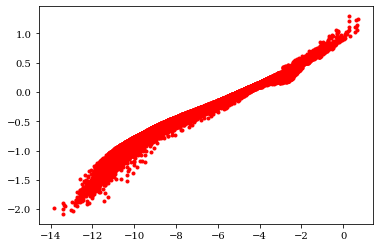

In [49]:
plt.plot(-tab_single.G_abs1,np.log(tab_single.mass1),'r.')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


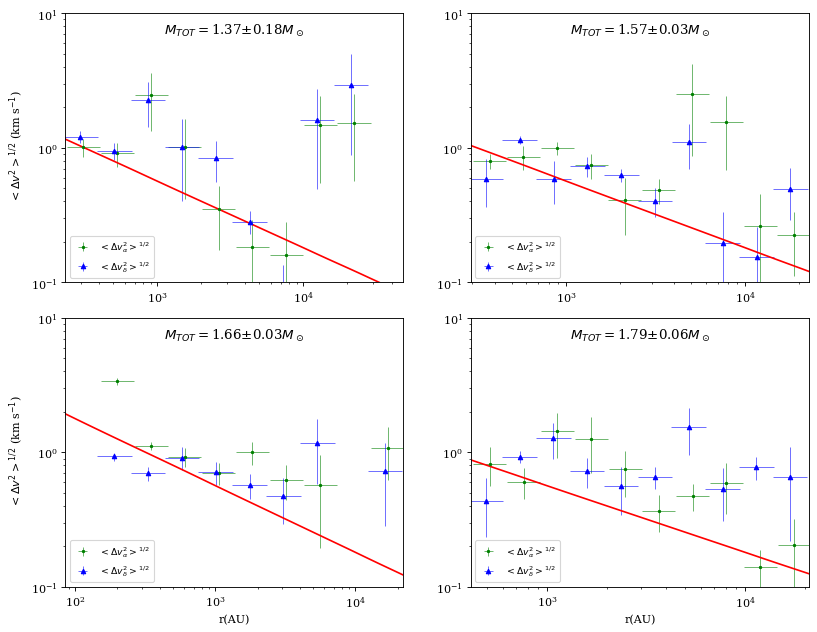

In [36]:
xsolid= 206000*rjacobi*10**(xspan)
ysolid=Omega_g_rj*10**(f2(xspan))

figname=''
fnt=10
showbins = False
#_xmin=10**rmin
#_xmax=10**rmax

xlabl='r(AU)'
#ylabl='$<\Delta v^2>^{1/2}$ (km s$^{-1}$)'
ylabl=' $<\Delta v^2>^{1/2}$ (km s$^{-1}$)'
_ymin=0.1
_ymax=10.
MONDline=7000

plt.figure(figsize=(12,10),dpi=80)

ax1a = plt.subplot2grid((20, 2), (0, 0), rowspan=9)
#ax1b = plt.subplot2grid((20, 3), (8, 0))

ax2a = plt.subplot2grid((20, 2), (0, 1), rowspan=9)
#ax2b = plt.subplot2grid((20, 3), (8, 1))

ax3a = plt.subplot2grid((20, 2), (10, 0), rowspan=9)
#ax3b = plt.subplot2grid((20, 3), (8, 2))

ax4a = plt.subplot2grid((20, 2), (10, 1), rowspan=9)
#ax4b = plt.subplot2grid((20, 3), (18, 0))

#Caracteristicas de la tabla
axn = 4
tablita = tab_single_color[1/tab_single_color.mass_ratio < 0.66]
span = len(tablita)//axn

#axioms = [(ax1a,ax1b),(ax2a,ax2b),(ax3a,ax3b),
#          (ax4a,ax4b),(ax5a,ax5b),(ax6a,ax6b)]

axioms = [(ax1a,0,'',ylabl),(ax2a,0,'',''),
          (ax3a,0,xlabl,ylabl),(ax4a,0,xlabl,'')]

for i in range(axn):
    
    if i < axn-1:
        subtab = tablita.sort_values('tot_mass').iloc[(i*span):((i+1)*span)].copy()
    else:
        subtab = tablita.sort_values('tot_mass').iloc[(i*span):].copy()
        
    rmin,rmax,step,sep,samp_ra,samp_dec,rms_ra,rms_ra_error,rms_dec,rms_dec_error,l =\
    make_histogram_spherical(subtab,rmin=False,rmax=False,rv_max=10,bins=10,poiss=False,
                             make_correction=True)
    
    ##Convert to AU
    rmin += 5.31
    rmax += 5.31
    #step += 5.31
    sep  += 5.31
    
    _xmin=10**rmin
    _xmax=10**rmax
    
    axioms[i][0].text(10**(0.5*(rmin+rmax)),_ymax-3,'$M_{TOT}=$%.2f$\pm$%.2f$M_\odot$'%(subtab.tot_mass.mean(),subtab.tot_mass.std()),
                      fontsize=fnt+2, horizontalalignment='center')
    axioms[i][0].loglog()
    
    axioms[i][0].plot(xsolid,ysolid,'r')
    axioms[i][0].set_xlabel(axioms[i][2],fontsize=fnt)
    
    axioms[i][0].set_ylabel(axioms[i][3],fontsize=fnt)
    
    axioms[i][0].set_xlim(_xmin,_xmax)
    axioms[i][0].set_ylim(_ymin,_ymax)
    
    axioms[i][0].errorbar(10**(sep+0.01),rms_ra,
                          rms_ra_error,
                          (10**sep - 10**(sep-0.5*step),
                           10**(sep+0.5*step) - 10**sep),
                          fmt='g.',
                          linewidth=0.5,
                          ms=4,
                          label=r'$<\Delta v_\alpha^2>^{1/2}$')
    
    axioms[i][0].errorbar(10**(sep-0.01),rms_dec,rms_dec_error,
                          (10**sep - 10**(sep-0.5*step),
                           10**(sep+0.5*step) - 10**(sep)),
                          fmt='b^',
                          linewidth=0.5,
                          ms=4,
                          label=r'$<\Delta v_\delta^2>^{1/2}$')

    axioms[i][0].legend(loc='lower left',
                        fontsize='small')
    
    if showbins:
        for i in range(len(sep)):
            axioms[i][0].text(10**(sep[i]),1.1*rms_dec[i],str(int(samp_ra[i])))
    
#    axioms[i][1].set_ylabel('freq',fontsize=fnt)
#    axioms[i][1].set_yscale('linear')
#    axioms[i][1].set_xlim(np.log10(_xmin),np.log10(_xmax))   
#    axioms[i][1].bar(sep,samp_ra,width=step*0.5,
#                     color='white',edgecolor='black',tick_label='')

#######################################################

file_name='masasdistintas_color_4'
if True:
    plt.savefig('%s.png'%file_name)
    #plt.savefig('rms_cmd//%s.jpg'%file_name)
    plt.savefig('%s.pdf'%file_name)
    plt.savefig('%s.ps'%file_name)
plt.show()

In [43]:
import numpy.random as rnd
sample = 9999

#Crear un arrelgo de vectores de longitud hasta ~1.2 pc
seps = rnd.exponential(0.5,sample)
#eps = rnd.exponential(0.3,sample)
pos = np.array([seps,np.zeros(sample),np.zeros(sample)]).transpose()
#velocidad circular newtoniana v=92.7*(s/pc)**-1/2 m/s
vel = np.array([92.74*(seps)**(-0.5),np.zeros(sample), np.zeros(sample)]).transpose()

# Girar los vectores de manea aleatoria (scramble)
for i in range(len(pos)):
    pos[i] = rot_y(rot_z(pos[i],np.arcsin(2*rnd.rand()-1)*180/np.pi),rnd.rand()*360)
    vel[i] = rot_y(rot_z(vel[i],np.arcsin(2*rnd.rand()-1)*180/np.pi),rnd.rand()*360)

###########################################################
#Ahora, creamos las posiciones de las estrellas primarias
distance = 100 #parsec
#Todas a la misma distancia
pri_pos = np.array([distance*np.ones(sample),np.zeros(sample),np.zeros(sample)]).transpose()
#Con distribucion de velocidades promedio de 30km/s
pri_vel = np.array([30000*rnd.randn(sample),
                   np.zeros(sample),np.zeros(sample)]).transpose()

# Girar los vectores de manea aleatoria (scramble)
for i in range(len(pri_pos)):
    pri_pos[i] = rot_y(rot_z(pri_pos[i],np.arcsin(2*rnd.rand()-1)*180/np.pi),rnd.rand()*360)
    pri_vel[i] = rot_y(rot_z(pri_vel[i],np.arcsin(2*rnd.rand()-1)*180/np.pi),rnd.rand()*360)
#pd.DataFrame()

#Posiciones y velocidades de las secundarias
sec_pos = pri_pos + pos
sec_vel = pri_vel + vel

# Combinar las tablas
#pd.DataFrame(pri_pos)
data = pd.merge( pd.merge(pd.DataFrame(pri_pos,columns=['x1','y1','z1']),
                          pd.DataFrame(pri_vel,columns=['vx1','vy1','vz1']),
                          left_index=True, right_index=True),
                pd.merge(pd.DataFrame(sec_pos,columns=['x2','y2','z2']),
                         pd.DataFrame(sec_vel,columns=['vx2','vy2','vz2']),
                         left_index=True, right_index=True),
                left_index=True, right_index=True)
data['xy_sep'] = np.sqrt((data.x2-data.x1)**2+(data.y2-data.y1)**2)
data['yz_sep'] = np.sqrt((data.y2-data.y1)**2+(data.z2-data.z1)**2)
data['zx_sep'] = np.sqrt((data.z2-data.z1)**2+(data.x2-data.x1)**2)

data['dvx'] = data.vx2-data.vx1
data['dvy'] = data.vy2-data.vy1
data['dvz'] = data.vz2-data.vz1

#Add errors
data['x1_err'] = 0.1
data['y1_err'] = 0.1
data['z1_err'] = 0.1
data['vx1_err'] = 50
data['vy1_err'] = 50
data['vz1_err'] = 50
data['x2_err'] = 0.1
data['y2_err'] = 0.1
data['z2_err'] = 0.1
data['vx2_err'] = 50
data['vy2_err'] = 50
data['vz2_err'] = 50

data['dvx_err'] = data.vx1_err + data.vx2_err
data['dvy_err'] = data.vy1_err + data.vy2_err
data['dvz_err'] = data.vz1_err + data.vz2_err

In [ ]:
xspan = np.linspace(DIST_trem.min(),DIST_trem.max(),100)

newtab = tab.nsmallest(int(35087/3),'mass_ratio')

for i in range(12):
    rebanada = newtab.nsmallest(int(35087/3)-1000*i,'tot_mass',keep='all').nlargest(1000,'tot_mass',keep='all')

    sep,samp,step,rms_ra,rms_ra_error,rms_dec,rms_dec_error,x = \
    make_histogram(rebanada,
                   rv_max=10,bins=10,rmin=-3.5,rmax=0.32,poiss=False)
    RMS_histogram(sep,samp,step,rms_ra,rms_ra_error,rms_dec,rms_dec_error,
                  rmax=0.32,rmin=-3.5,
                  save='low/b%02d_M%.3f'%(i,rebanada.tot_mass.mean()),
                  figname='low b%s <Mass>=%f$\pm$%f'%(i,rebanada.tot_mass.mean(),rebanada.tot_mass.std()),
                  fnt=14,xlabl='sep(pc)',ylabl='RMS',
                  _xmin=10**(-3.5),
                  _xmax=10**(0.5),
                  _ymin=0.03,
                  _ymax=10.,
                  xsolid= rjacobi*10**(xspan),
                  ysolid=Omega_g_rj*10**(f2(xspan)),
                  showbins=True,
                  MONDline=7000/200000)

<IPython.core.display.Javascript object>


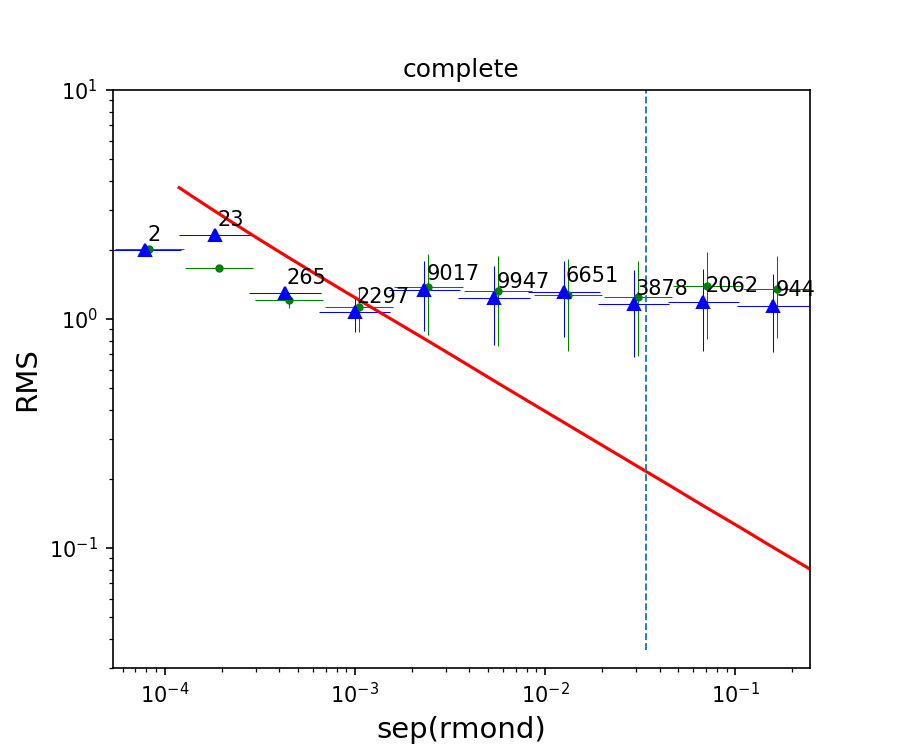

In [9]:
xspan = np.linspace(DIST_trem.min(),DIST_trem.max(),100)

#newtab = tab.nsmallest(int(35087/3),'mass_ratio')
newtab = tab.copy()

#for i in range(12):
for i in [1]:
#    rebanada = newtab.nsmallest(int(35087/3)-1000*i,'tot_mass',keep='all').nlargest(1000,'tot_mass',keep='all')

    rebanada = tab.copy()
    sep,samp,step,rms_ra,rms_ra_error,rms_dec,rms_dec_error,x = \
    make_histogram(rebanada,
                   rv_max=10,bins=10,poiss=False)
    RMS_histogram(sep,samp,step,rms_ra,rms_ra_error,rms_dec,rms_dec_error,
                  save='',
#                  figname='mond_low b%s <Mass>=%f$\pm$%f'%(i,rebanada.tot_mass.mean(),rebanada.tot_mass.std()),
                  figname='complete',
                  fnt=14,xlabl='sep(rmond)',ylabl='RMS',
#                  _xmin=10**(-5),
#                  _xmax=10**(1),
                  _xmin = rebanada.proy_sep_GDR2.min(),
                  _xmax = rebanada.proy_sep_GDR2.max(),
                  _ymin=0.03,
                  _ymax=10.,
                  xsolid= rjacobi*10**(xspan),
                  ysolid=Omega_g_rj*10**(f2(xspan)),
                  showbins=True,
                  MONDline=7000/206000)

## Corrección esférica

Aquí se trata de que sea esférico.

In [ ]:
plt.semilogy?

In [ ]:
fig = plt.figure(figsize=(6,5),dpi=150)
figname='Correcciones'
fnt=14

plt.loglog()
#plt.semilogx()
plt.xlabel('proyected_sep(pc)',fontsize=fnt)
plt.ylabel('correction(km/s)',fontsize=fnt)
plt.suptitle(r'Por separación física')
#plt.title('Binarias, sin seleccionar')

#plt.xlim(0.3E-2,1E1)
#plt.ylim(0.001,10.)


plt.plot(spl.proy_sep,
         np.abs(spl.v1_ra_diff),
         '^',
         markersize=0.5,
         label=r'$\Delta\mu_\alpha$')
plt.plot(spl.proy_sep,
         np.abs(spl.v1_dec_diff),
         '.',
         markersize=0.5,
         label=r'$\Delta\mu_\delta$')
plt.legend()

In [ ]:
fig = plt.figure(figsize=(6,5),dpi=150)
figname='Correcciones'
fnt=14

plt.loglog()
#plt.semilogx()
plt.xlabel('sep_ang(arcsec)',fontsize=fnt)
plt.ylabel('correction(km/s)',fontsize=fnt)
plt.suptitle(r'Por separación angular')
#plt.title('Binarias, sin seleccionar')

#plt.xlim(0.3E-2,1E1)
#plt.ylim(0.001,10.)


plt.plot(spl.ang_sep*3600,
         np.abs(spl.v1_ra_diff),
         '^',
         markersize=0.5,
         label=r'$\Delta\mu_\alpha$')
plt.plot(spl.ang_sep*3600,
         np.abs(spl.v1_dec_diff),
         '.',
         markersize=0.5,
         label=r'$\Delta\mu_\delta$')
plt.legend()

## Diagramas separacion velocidad

## Movimientos propios y paralaje

In [ ]:
#Diagrama separacion velocidad

fig = plt.figure(figsize=(6,5),dpi=150)
figname='Velocidad tangencial'
fnt=14

plt.loglog()

plt.title(figname)
plt.xlabel('$\Delta$ R(pc)')
plt.ylabel('$\Delta$v(km/s)')

#plt.xlim((1E-3,10**1.5))
#plt.ylim((1E-2,1E2))

c = (np.pi*3.086E13)/(180*3600*1000*365*24*3600.)


#plt.plot(good_pairs.proy_sep_GDR2,
#         good_pairs.rel_vel_GDR2,
#         '.',
#         label='GDR2')

plt.plot(tab.proy_sep_GDR2,
         np.sqrt((spl.dvra+spl.v1_ra_diff)**2+(spl.dvdec+spl.v1_dec_diff)**2),
         '.',
         markersize=0.8,
         label='GDR2')

# G*Msol = 0.0921 pc^-(1/2) km/s
plt.plot(np.logspace(-3,0.5),
         (0.5*3**(-0.5))*np.sqrt(36*4.306E-3)*np.power(np.logspace(-4,2),-.5),
         label='Newtonian limit')
#plt.plot(np.logspace(-3,0.5),
#         np.sqrt(36*4.306E-3)*np.power(np.logspace(-3,2),-.5),
#         label='Newtonian limit')
#plt.show()
#plt.savefig('1vs2__.png')

plt.legend()

<IPython.core.display.Javascript object>


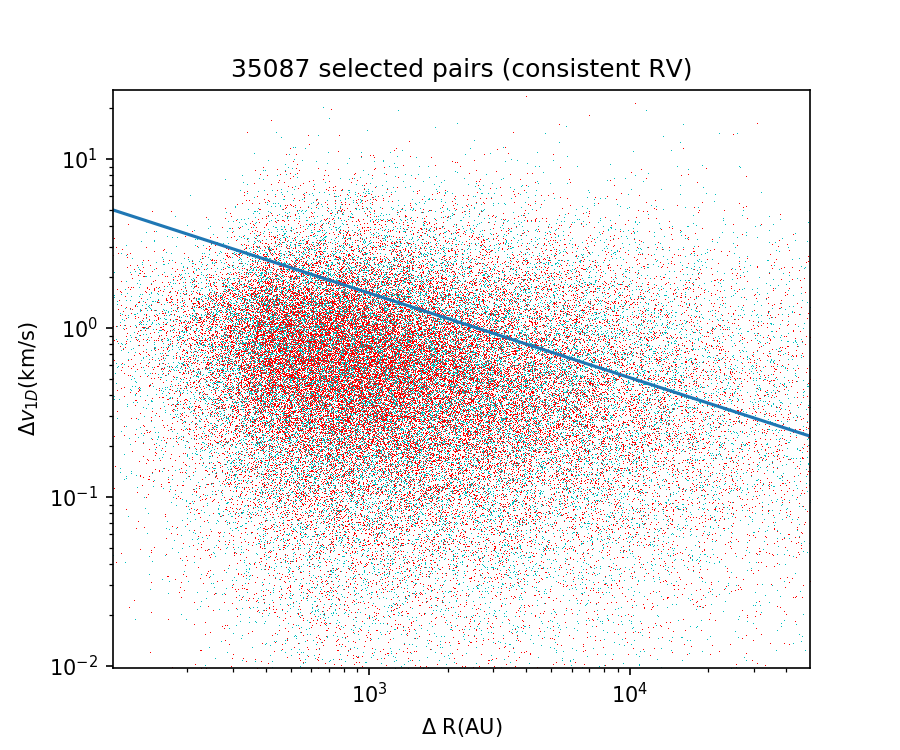

In [9]:
#Diagrama separacion velocidad

fig = plt.figure(figsize=(6,5),dpi=150)
figname='%d selected pairs (consistent RV)'%tab.shape[0]
fnt=14

plt.style.use('default')
#plt.style.use(plt.style.available[24])

plt.loglog()

plt.title(figname)
plt.xlabel('$\Delta$ R(AU)')
plt.ylabel('$\Delta v_{1D}$(km/s)')

plt.xlim((1E2,1E6))
#plt.ylim((1E-2,1E2))

c = (np.pi*3.086E13)/(180*3600*1000*365*24*3600.)

separation_au = tab.proy_sep_GDR2*206000
ravel         = np.abs(tab.dvelra_corr)
decvel        = np.abs(tab.dvelde_corr)

plt.plot(separation_au, ravel,
         'c,',
#         markersize=2,
         label='$\Delta\mu_\alpha$')

plt.plot(separation_au, decvel,
         'r,',
#         markersize=2,
         label='$\Delta\mu_\delta$')

# G*Msol = 0.0921 pc^-(1/2) km/s
plt.plot(np.logspace(2,5.7),
         (0.5*3**(-0.5))*np.sqrt(36*4.306E-3)*np.power(np.logspace(2,5.7)*(0.5E-5),-.5),
         label='Newtonian limit')
#plt.plot(np.logspace(-3,0.5),
#         np.sqrt(36*4.306E-3)*np.power(np.logspace(-3,2),-.5),
#         label='Newtonian limit')
#plt.show()
#plt.savefig('1vs2__.png')

plt.legend()

<IPython.core.display.Javascript object>


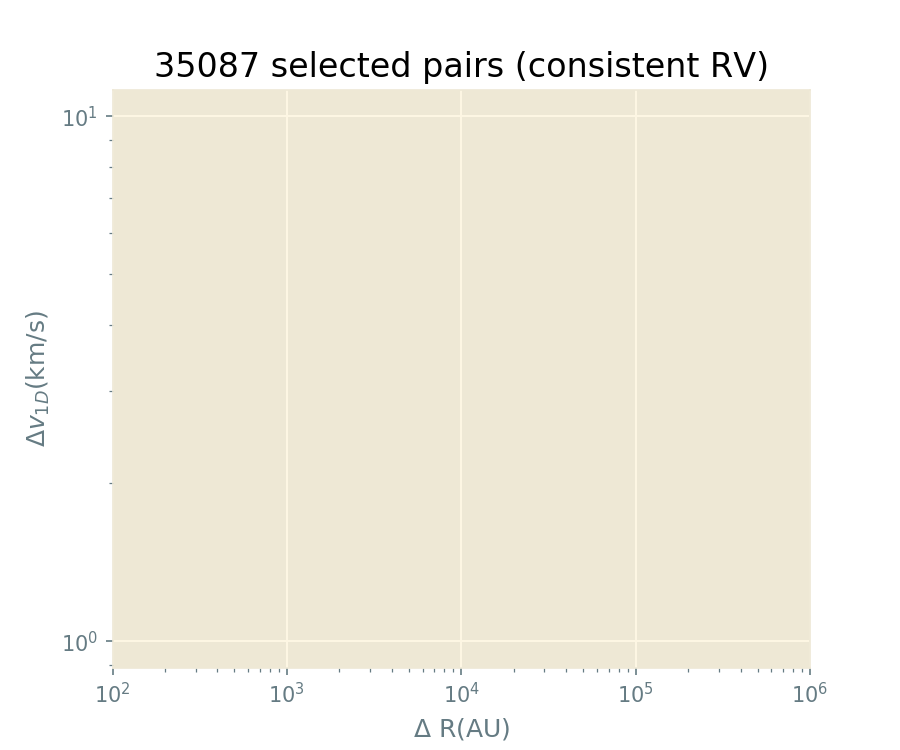

AttributeError: 'DataFrame' object has no attribute 'mass_x'

In [12]:
#Diagrama separacion velocidad

fig = plt.figure(figsize=(6,5),dpi=150)
figname='%d selected pairs (consistent RV)'%tab.shape[0]
fnt=14

plt.style.use('default')
plt.style.use(plt.style.available[0])

plt.loglog()

plt.title(figname)
plt.xlabel('$\Delta$ R(AU)')
plt.ylabel('$\Delta v_{1D}$(km/s)')

plt.xlim((1E2,1E6))
#plt.ylim((1E-2,1E2))

c = (np.pi*3.086E13)/(180*3600*1000*365*24*3600.)

separation_au = tab.proy_sep_GDR2*206000
ravel         = np.abs(tab.dvelra_corr)
decvel        = np.abs(tab.dvelde_corr)
mais          = tab.mass_x+tab.mass_y
colmap        = plt.cm.rainbow
pntsze        = 2

plt.scatter(separation_au,ravel,
            s=pntsze,c=mais,
            cmap=colmap)

plt.scatter(separation_au,decvel,
            s=pntsze,c=mais,
            cmap=colmap)

plt.colorbar()
"""
plt.plot(separation_au, ravel,
         'c.',
         markersize=2,
         label='$\Delta\mu_\alpha$')

plt.plot(separation_au, decvel,
         'r.',
         markersize=2,
         label='$\Delta\mu_\delta$')
"""

# G*Msol = 0.0921 pc^-(1/2) km/s
plt.plot(np.logspace(2,5.7),
         (0.5*3**(-0.5))*np.sqrt(36*4.306E-3)*np.power(np.logspace(2,5.7)*(0.5E-5),-.5),
         label='Newtonian limit')
#plt.plot(np.logspace(-3,0.5),
#         np.sqrt(36*4.306E-3)*np.power(np.logspace(-3,2),-.5),
#         label='Newtonian limit')
#plt.show()
#plt.savefig('1vs2__.png')

plt.legend()

<IPython.core.display.Javascript object>


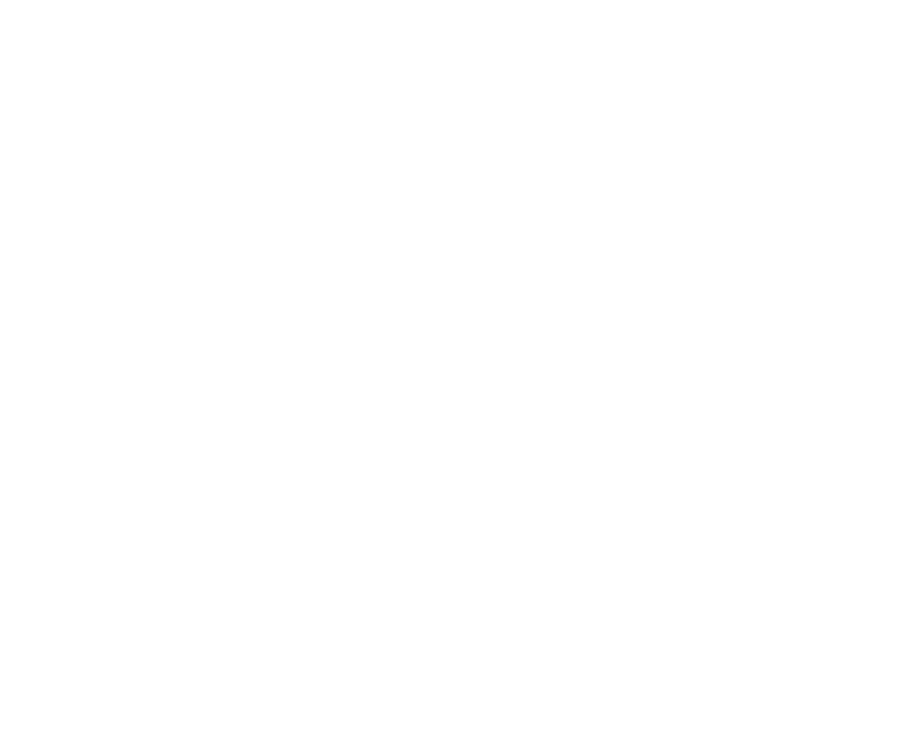

AttributeError: 'DataFrame' object has no attribute 'mass_x'

In [11]:
#Diagrama separacion velocidad

fig = plt.figure(figsize=(6,5),dpi=150)
figname='%d selected pairs (consistent RV)'%tab.shape[0]
fnt=14

plt.style.use('default')
plt.style.use(plt.style.available[24])

plt.loglog()

plt.title(figname)
plt.xlabel('$\Delta$ R(AU)')
plt.ylabel('$\Delta v_{1D}$(km/s)')

plt.xlim((1E2,1E6))
#plt.ylim((1E-2,1E2))

c = (np.pi*3.086E13)/(180*3600*1000*365*24*3600.)

mass = 2
separation_au = tab.proy_sep_GDR2[tab.mass_x < mass]*206000
ravel         = np.abs(tab.dvelra_corr[tab.mass_x < mass])
decvel        = np.abs(tab.dvelde_corr[tab.mass_x < mass])

plt.plot(separation_au, ravel,
         'c.',
         markersize=2,
         label='$\Delta\mu_\alpha$')

plt.plot(separation_au, decvel,
         'r.',
         markersize=2,
         label='$\Delta\mu_\delta$')

# G*Msol = 0.0921 pc^-(1/2) km/s
plt.plot(np.logspace(2,5.7),
         (0.5*3**(-0.5))*np.sqrt(36*4.306E-3)*np.power(np.logspace(2,5.7)*(0.5E-5),-.5),
         label='Newtonian limit')
#plt.plot(np.logspace(-3,0.5),
#         np.sqrt(36*4.306E-3)*np.power(np.logspace(-3,2),-.5),
#         label='Newtonian limit')
#plt.show()
#plt.savefig('1vs2__.png')

plt.legend()

In [ ]:
#Hertzprung-Russel

fig = plt.figure(figsize=(6,5),dpi=150)
figname=''
fnt=14

plt.style.use('default')
plt.style.use(plt.style.available[24])

plt.title(figname)
plt.xlabel('$\Delta$ R(AU)')
plt.ylabel('$\Delta v_{1D}$(km/s)')

#plt.xlim((1E2,1E6))
#plt.ylim((1E-2,1E2))

#c = (np.pi*3.086E13)/(180*3600*1000*365*24*3600.)

#separation_au = tab.proy_sep_GDR2*206000
#ravel         = np.abs(tab.dvelra_corr)
#decvel        = np.abs(tab.dvelde_corr)
#plt.plot(tab.bp_rp_x,-tab.phot_g_mean_mag_x,
#         '.',markersize=.5)
#plt.plot(tab.bp_rp_y,-tab.phot_g_mean_mag_y,
#         '.',markersize=.5)
plt.plot(tab.teff_val_x,-tab.phot_bp_mean_mag_x,
         '.',markersize=.5)
plt.plot(tab.teff_val_y,-tab.phot_g_mean_mag_y,
         '.',markersize=.5)


#plt.legend()

In [ ]:
#Diagrama separacion velocidad radial
fig = plt.figure(figsize=(6,5),dpi=150)
figname='Velocidad radial'
fnt=14

plt.loglog()

plt.title(figname)
plt.xlabel('$\Delta$ R(pc)')
plt.ylabel('$\Delta$v(km/s)')

#plt.xlim((1E-3,10**1.5))
#plt.ylim((1E-2,1E2))

c = (np.pi*3.086E13)/(180*3600*1000*365*24*3600.)

x_temp = spl[~spl.rv1.isna() &
             ~spl.rv2.isna()]

plt.errorbar(x_temp.proy_sep,
             np.abs(x_temp.rv2 - x_temp.rv1 + x_temp.rv1_diff),
             np.abs(x_temp.rv1_err) + np.abs(x_temp.rv2_err),
#             x_temp.proy_sep_err,
             linewidth=0.2,fmt='.',capsize=1,
             markersize=1,
             label='GDR2')
"""
for i in x_temp.index:
    if np.abs(x_temp.radial_velocity_y[i] - x_temp.radial_velocity_x[i]) > 10*np.sqrt(36*4.306E-3)*x_temp.proy_sep_GDR2[i]**-.5:
        plt.text(x_temp.proy_sep_GDR2[i],
                 np.abs(x_temp.radial_velocity_y[i] - x_temp.radial_velocity_x[i]),
                 str(x_temp.Ind[i]),
                 fontsize=10)

plt.plot(x_temp.proy_sep_GDR2,
             np.abs(x_temp.radial_velocity_y - x_temp.radial_velocity_x),
         '.',
             linewidth=1,
             label='GDR2')
"""

# G*Msol = 0.0921 pc^-(1/2) km/s
plt.plot(np.logspace(-3,0.5),
         np.sqrt(36*4.306E-3)*np.power(np.logspace(-3,2),-.5),
         label='Newtonian limit')
#plt.show()
#plt.savefig('1vs2__.png')

"""
x = good_pairs.copy()
sig = 1.5


x = x[(np.abs(1.-x.pmRA_y/x.pmra_y) > sig*np.abs(
              (x.pmRA_y/x.pmra_y)*(x.e_pmRA_y/x.pmRA_y+x.pmra_error_y/x.pmra_y))) |
          (np.abs(1.-x.pmDE_y/x.pmdec_y) > sig*np.abs(
              (x.pmDE_y/x.pmdec_y)*(x.e_pmDE_y/x.pmDE_y+x.pmdec_error_y/x.pmdec_y))) |
          (np.abs(1.-x.Plx_y/x.parallax_y) > sig*np.abs(
              (x.Plx_y/x.parallax_y)*(x.e_Plx_y/x.Plx_y+x.parallax_error_y/x.parallax_y))) |
      (np.abs(1.-x.pmRA_x/x.pmra_x) > sig*np.abs(
              (x.pmRA_x/x.pmra_x)*(x.e_pmRA_x/x.pmRA_x+x.pmra_error_x/x.pmra_x))) |
          (np.abs(1.-x.pmDE_y/x.pmdec_y) > sig*np.abs(
              (x.pmDE_x/x.pmdec_x)*(x.e_pmDE_x/x.pmDE_x+x.pmdec_error_x/x.pmdec_x))) |
          (np.abs(1.-x.Plx_x/x.parallax_x) > sig*np.abs(
              (x.Plx_x/x.parallax_x)*(x.e_Plx_x/x.Plx_x+x.parallax_error_x/x.parallax_x))) &
         True]



plt.plot(x.proy_sep_GDR2,
         np.abs(x.radial_velocity_y - x.radial_velocity_x),
         'x',
         label='outliers > %.2f sigma'%sig)
"""            
plt.show()
#plt.legend()

<IPython.core.display.Javascript object>


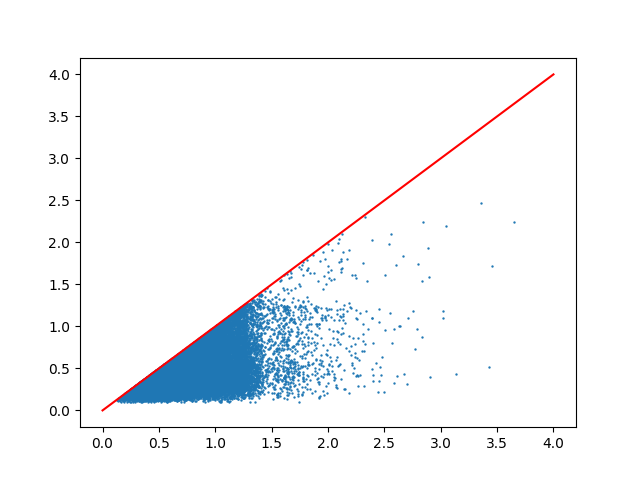

In [36]:
#tab.columns
#plot(tab.m)
#plt.scatter(tab.phot_g_mean_mag_x,tab.phot_g_mean_mag_y,s=0.5)
plt.scatter(tab.mass1,tab.mass2,s=0.5)
plt.plot(np.linspace(0,4),np.linspace(0,4),'r')
#plt.plot(np.linspace(3,20),np.linspace(3,20),'r')

<IPython.core.display.Javascript object>


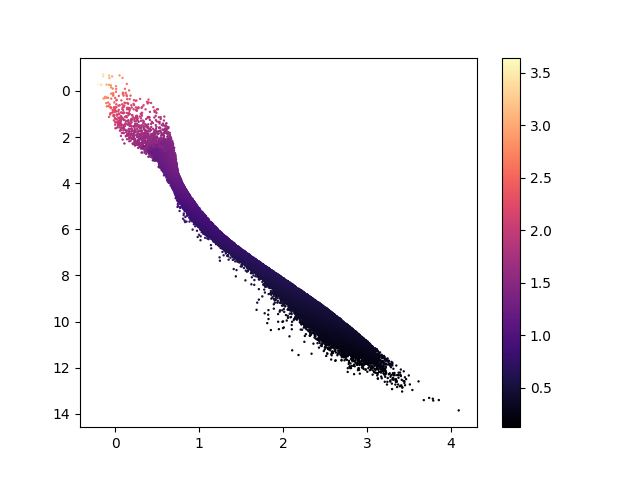

In [38]:
formt=','
plt.gca().invert_yaxis()
#plt.plot(tab.phot_bp_mean_mag_x-tab.phot_g_mean_mag_x,
#         tab.phot_g_mean_mag_x - 5*np.log10(tab.distance_x/10),
#        formt)
#plt.plot(tab.phot_g_mean_mag_x-tab.phot_rp_mean_mag_x,
#         tab.phot_g_mean_mag_x - 5*np.log10(tab.distance_x/10),
#        formt)
plt.scatter(tab.phot_bp_mean_mag_x-tab.phot_rp_mean_mag_x,
            tab.phot_g_mean_mag_x - 5*np.log10(tab.distance_x/10),
            s=0.5,
            c=tab.mass1,
            cmap=plt.cm.magma)
plt.colorbar()
#        formt)

#plt.plot(tab.phot_g_mean_mag_y-tab.phot_rp_mean_mag_y,
#         tab.phot_g_mean_mag_y - 5*np.log10(tab.distance_y/10),
#        formt)

## Criterion selection

In [ ]:
spl.N4.describe()

In [ ]:
spl.N4.hist(bins=range(0,30))

In [ ]:
# cRITERION selection
#x = good_pairs.copy()
#x = good_stars.copy()
sig = 3.0

x = seleccion(good_pairs,sigma=3.,rvel=3.)

#turd = x[(x.proy_sep_GDR2 > 1.99) &
#  (x.proy_sep_GDR2 < 10.)][['Ind','pmra_x','pmra_y','pmdec_x','pmdec_y','parallax_x','parallax_y']]
#vel_tan_diff(turd.pmra_x,1E-30,1000./turd.parallax_x,
#             turd.pmra_y,1E-30,1000./turd.parallax_y)
#1000/turd.parallax_y

In [ ]:
dump.shape

In [ ]:
splnew = spl[~(spl.rv2.isna() | spl.rv1.isna())]
(splnew.rv2 - splnew.rv1).hist(range)

## Histogram

In [ ]:
np.sum(samp)

In [ ]:
# Aplicando la corrección esférica

def N2_model(x):
    return 2*0.5**(np.log10(x))
def N4_model(x):
    return 20*3**(-np.log10(x)/3)

def make_histogram(N2_max, N4_max,
                   rv_max=10,bins=10,rmin=-3.5,rmax=0.32,table=tab,poiss=False):
#    x = table[((np.abs(table.rv2 - table.rv1 + table.rv1_diff) < rv_max) & ~table.rv1.isna() & ~table.rv2.isna()) &
#              (table.N2 <= N2_max) &
#              (table.N4 <= N4_max)].copy()
#              (table.N2 <= N2_model(table.proy_sep)) &
#              (table.N4 <= N4_model(table.proy_sep))].copy()
    #pc*mas/yr to km/s
    x = table.copy()
    k = 1000*(np.pi/(180*3600*1000))*(3.086E13)/(365*24*3600.)
    
    step   = (rmax-rmin)/bins

    rms_ra=[]
    rms_ra_error=[]
    rms_dec=[]
    rms_dec_error=[]
    rms_tan=[]
    rms_tan_error=[]
    rms_rad=[]
    rms_rad_error=[]
    sep=[]
    samp=[]

    for i in range(bins):
        _temp = x[(x.proy_sep_GDR2 > 10**(rmin+i*step)) &
                  (x.proy_sep_GDR2 < 10**(rmin+(i+1)*step))]
#        print('Intervalo %f %f\n'%(10**(rmin+i*step),10**(rmin+(i+1)*step)))
    #CORRECION ESFERICA SOBRE LA PRIMARIA    

        pmrax = _temp.pmra_corrected_x - _temp.pmra_corr
        pmdex = _temp.pmdec_corrected_x - _temp.pmde_corr
        pmray = _temp.pmra_corrected_y
        pmdey = _temp.pmdec_corrected_y
        distx = 1000./_temp.parallax_x
        disty = 1000./_temp.parallax_y
        rvelx = _temp.radial_velocity_x - _temp.rvel_corr
        rvely = _temp.radial_velocity_y

#       pmrax = (_temp.v1_ra - _temp.v1_ra_diff)*1000/(k*_temp.d1)
#       pmdex = (_temp.v1_dec - _temp.v1_dec_diff)*1000/(k*_temp.d1)
#       pmray = _temp.v2_ra*1000/(k*_temp.d2)
#       pmdey = _temp.v2_dec*1000/(k*_temp.d2)
#       distx = _temp.d1
#       disty = _temp.d2

#       rvelx = _temp.rv1 - _temp.rv1_diff
#       rvely = _temp.rv2
        pmrax_err = _temp.pmra_corrected_error_x
        pmdex_err = _temp.pmdec_corrected_error_x
        pmray_err = _temp.pmra_corrected_error_y
        pmdey_err = _temp.pmdec_corrected_error_y
        distx_err = distx*_temp.parallax_error_x/_temp.parallax_x
        disty_err = disty*_temp.parallax_error_y/_temp.parallax_y
        rvelx_err = _temp.radial_velocity_error_x
        rvely_err = _temp.radial_velocity_error_y
    
#       pmrax_err = pmrax*(_temp.v1_ra_err/_temp.v1_ra   + _temp.d1_err/_temp.d1)
#       pmdex_err = pmdex*(_temp.v1_dec_err/_temp.v1_dec + _temp.d1_err/_temp.d1)
#       pmray_err = pmray*(_temp.v2_ra_err/_temp.v2_ra   + _temp.d2_err/_temp.d2)
#       pmdey_err = pmdey*(_temp.v2_dec_err/_temp.v2_dec + _temp.d2_err/_temp.d2)
#       distx_err = _temp.d1_err
#       disty_err = _temp.d2_err
#       rvelx_err = _temp.rv1_err
#       rvely_err = _temp.rv2_err
        
        rmsa = np.sqrt((vel_tan_diff(pmrax,0.,distx,
                                     pmray,0.,disty)**2).mean())
        rmsa_error = (np.abs(
            vel_tan_diff(pmrax,0.,distx,pmray,0.,disty)*
            vel_tan_diff_err(pmrax,pmrax_err,1E-20,1E-30,distx,distx_err,
                             pmray,pmray_err,1E-20,1E-30,disty,disty_err))).mean()/rmsa
#    rmsa_error = c**2*(np.abs((disty*pmray-distx*pmrax)*(
#                                 disty_err*pmray+
#                                 disty*pmray_err+
#                                 distx_err*pmrax+
#                                 distx*pmrax_err)).mean())/rmsa

        rmsd = np.sqrt((vel_tan_diff(0.,pmdex,distx,
                                     0.,pmdey,disty)**2).mean())
        rmsd_error = (np.abs(
            vel_tan_diff(0.,pmdex,distx,0.,pmdey,disty)*
            vel_tan_diff_err(1E-20,1E-30,pmdex,pmdex_err,distx,distx_err,
                             1E-20,1E-30,pmdey,pmdey_err,disty,disty_err))).mean()/rmsd

        rmst = np.sqrt(rmsa**2+rmsd**2)
        
        rmst_error = (np.abs(
            vel_tan_diff(pmrax,pmdex,distx,pmray,pmdey,disty)*
            vel_tan_diff_err(pmrax,pmrax_err,pmdex,pmdex_err,distx,distx_err,
                             pmray,pmray_err,pmdey,pmdey_err,disty,disty_err))).mean()/rmst
    
        rmsr = np.sqrt(((rvely-rvelx)**2).mean())
        rmsr_error = np.abs((rvely-rvelx)*(rvelx_err+rvely_err)).mean()/rmsr
    
        # Agregar error poissoniano:
        
        if poiss:
            rmsa_error = np.sqrt(_temp.shape[0])*rmsa_error
            rmsd_error = np.sqrt(_temp.shape[0])*rmsd_error
    
        rms_ra.append(rmsa)
        rms_ra_error.append(rmsa_error)
        rms_dec.append(rmsd)
        rms_dec_error.append(rmsd_error)
        rms_tan.append(rmst)
        rms_tan_error.append(rmst_error)
        rms_rad.append(rmsr)
        rms_rad_error.append(rmsr_error)
        sep.append(rmin+(i+0.5)*step)
        samp.append(_temp.shape[0])
    
#        print(rmsa, rmsa_error)
#        print(rmsd, rmsd_error)
#    print(rmst, rmst_error)
#        print(step)
#        print('x')
#    print(sep)
    return sep,samp,step,rms_ra,rms_ra_error,rms_dec,rms_dec_error,x

In [ ]:
np.log10(tab.proy_sep_GDR2.max())

## Final plots

In [ ]:
#RMS

# Make histogram
N2,N4 = 999,999
np
sep,samp,step,rms_ra,rms_ra_error,rms_dec,rms_dec_error,dump = make_histogram(N2, N4,bins=8,rv_max=999,
                                                                              rmax=0.38,
                                                                              rmin=-2.54)

save = False
fig = plt.figure(figsize=(6,5),dpi=150)
#fig.suptitle('Con correccion+')
#figname='fig04'
figname='fig04'

fnt=14

plt.loglog()
plt.xlabel(r'$\Delta r_{p}$/pc',fontsize=fnt)
plt.ylabel(r'$<\Delta v_{1D}^2>^{1/2}$/km s$^{-1}$',fontsize=fnt)

plt.xlim(10**(-3.5),10**(0.5))
plt.ylim(0.03,10.)

xspan = np.linspace(DIST_trem.min(),DIST_trem.max(),100)
#plt.xlim((10**(-3),10**(1.5)))

# YANG TREMAINE
plt.plot(
    #rjacobi*10**(DIST_trem),Omega_g_rj*10**(RMS_trem),'x'
    #xspan,f1(xspan),'-g',
    rjacobi*10**(xspan),Omega_g_rj*10**(f2(xspan)),'r')

# Integrantes del bin
"""
for i in range(len(sep)):
    plt.text(10**(sep[i]),1.1*rms_ra[i],str(samp[i]))
"""

plt.errorbar(10**(np.array(sep)+0.01),rms_ra,
             rms_ra_error,
             (10**(np.array(sep)) - 10**(np.array(sep)-0.5*step),
              10**(np.array(sep)+0.5*step) - 10**(np.array(sep))),
             fmt='g.',
             linewidth=0.5,
            label=r'$<\Delta v_\alpha^2>^{1/2}$')

if False:
    for i in range(len(sep)):
        plt.text(10**(sep[i]),1.1*rms_dec[i],str(samp[i]))


plt.errorbar(10**(np.array(sep)-0.01),rms_dec,rms_dec_error,
             (10**(np.array(sep)) - 10**(np.array(sep)-0.5*step),
              10**(np.array(sep)+0.5*step) - 10**(np.array(sep))),             
             fmt='b^',
             linewidth=0.5,
             label=r'$<\Delta v_\delta^2>^{1/2}$')

#for i in range(len(sep)):
#    plt.text(10**(sep[i]),1.1*rms_tan[i],str(samp[i]))
#plt.errorbar(10**(np.array(sep)),rms_tan,rms_tan_error,
#             (10**(np.array(sep)) - 10**(np.array(sep)-0.5*step),
#              10**(np.array(sep)+0.5*step) - 10**(np.array(sep))),
#             fmt='^',
#             linewidth=0.5,
#            label=r'$<\Delta v_\alpha^2 + \Delta v_\delta^2>^{1/2}$')

#plt.errorbar(10**(np.array(sep)),rms_rad,rms_rad_error,
#             (10**(np.array(sep)) - 10**(np.array(sep)-0.5*step),
#              10**(np.array(sep)+0.5*step) - 10**(np.array(sep))),
#             fmt='*',
#             linewidth=0.5,
#            label=r'$<\Delta v_r^2>^{1/2}$')

#plt.plot(10**xspan,0.001*(1.2E-10*3.086E16)**0.5*(10**xspan)**0.5,
#         '--')
#plt.text(2,6,r'$(\Delta v_{1D})^2/ \Delta r_p=a_0$',
#        rotation=30)

#plt.text(0.5,5,"N2=%d\nN4=%d"%(N2,N4))

plt.axvline(x=0.034, ymin=0.009, ymax=10,
             linestyle='--',linewidth=0.9)
#plt.legend()
if save:
    plt.savefig('%s.png'%figname)
    plt.savefig('%s.jpg'%figname)
    plt.savefig('%s.ps'%figname)
    plt.savefig('%s.pdf'%figname)

In [ ]:
#RMS

# Make histogram
N2,N4 = 999,999
np
sep,samp,step,rms_ra,rms_ra_error,rms_dec,rms_dec_error,dump = make_histogram(N2, N4,bins=8,rv_max=999,
                                                                              rmax=0.38,
                                                                              rmin=-2.54)

save = False
fig = plt.figure(figsize=(6,5),dpi=150)
#fig.suptitle('Con correccion+')
#figname='fig04'
figname='fig04'

fnt=14

plt.loglog()
plt.xlabel(r'$\Delta r_{p}$/pc',fontsize=fnt)
plt.ylabel(r'$<\Delta v_{1D}^2>^{1/2}$/km s$^{-1}$',fontsize=fnt)

plt.xlim(10**(-3.5),10**(0.5))
plt.ylim(0.03,10.)

xspan = np.linspace(DIST_trem.min(),DIST_trem.max(),100)
#plt.xlim((10**(-3),10**(1.5)))

# YANG TREMAINE
plt.plot(
    #rjacobi*10**(DIST_trem),Omega_g_rj*10**(RMS_trem),'x'
    #xspan,f1(xspan),'-g',
    rjacobi*10**(xspan),Omega_g_rj*10**(f2(xspan)),'r')

# Integrantes del bin
"""
for i in range(len(sep)):
    plt.text(10**(sep[i]),1.1*rms_ra[i],str(samp[i]))
"""

plt.errorbar(10**(np.array(sep)+0.01),rms_ra,
             rms_ra_error,
             (10**(np.array(sep)) - 10**(np.array(sep)-0.5*step),
              10**(np.array(sep)+0.5*step) - 10**(np.array(sep))),
             fmt='g.',
             linewidth=0.5,
            label=r'$<\Delta v_\alpha^2>^{1/2}$')

if False:
    for i in range(len(sep)):
        plt.text(10**(sep[i]),1.1*rms_dec[i],str(samp[i]))


plt.errorbar(10**(np.array(sep)-0.01),rms_dec,rms_dec_error,
             (10**(np.array(sep)) - 10**(np.array(sep)-0.5*step),
              10**(np.array(sep)+0.5*step) - 10**(np.array(sep))),             
             fmt='b^',
             linewidth=0.5,
             label=r'$<\Delta v_\delta^2>^{1/2}$')

#for i in range(len(sep)):
#    plt.text(10**(sep[i]),1.1*rms_tan[i],str(samp[i]))
#plt.errorbar(10**(np.array(sep)),rms_tan,rms_tan_error,
#             (10**(np.array(sep)) - 10**(np.array(sep)-0.5*step),
#              10**(np.array(sep)+0.5*step) - 10**(np.array(sep))),
#             fmt='^',
#             linewidth=0.5,
#            label=r'$<\Delta v_\alpha^2 + \Delta v_\delta^2>^{1/2}$')

#plt.errorbar(10**(np.array(sep)),rms_rad,rms_rad_error,
#             (10**(np.array(sep)) - 10**(np.array(sep)-0.5*step),
#              10**(np.array(sep)+0.5*step) - 10**(np.array(sep))),
#             fmt='*',
#             linewidth=0.5,
#            label=r'$<\Delta v_r^2>^{1/2}$')

#plt.plot(10**xspan,0.001*(1.2E-10*3.086E16)**0.5*(10**xspan)**0.5,
#         '--')
#plt.text(2,6,r'$(\Delta v_{1D})^2/ \Delta r_p=a_0$',
#        rotation=30)

#plt.text(0.5,5,"N2=%d\nN4=%d"%(N2,N4))

plt.axvline(x=0.034, ymin=0.009, ymax=10,
             linestyle='--',linewidth=0.9)
#plt.legend()
if save:
    plt.savefig('%s.png'%figname)
    plt.savefig('%s.jpg'%figname)
    plt.savefig('%s.ps'%figname)
    plt.savefig('%s.pdf'%figname)

In [ ]:
#Figure

fig = plt.figure(figsize=(6,5),dpi=150)
figname='fig05'
fnt=14

plt.loglog()
#plt.semilogx()
plt.xlabel(r'$\Delta r_{p}$/pc',fontsize=fnt)
plt.ylabel(r'$\Delta v_{1D}$/km s$^{-1}$',fontsize=fnt)
#plt.suptitle('Sin correccion')
#plt.title('Binarias, sin seleccionar')

plt.xlim(0.3E-2,1E1)
plt.ylim(0.001,10.)

#Todas
x = seleccion(good_pairs,sigma=3.,rvel=3.)

cp=1
thi=0.5
plt.errorbar(x.proy_sep_GDR2,
########################CON CORRECION             
#             vel_tan_diff(x.pmra_x,0.,500.*(1./ x.parallax_x + 1./ x.parallax_y),
             vel_tan_diff(x.pmra_x-x.pmra_corr ,0.,500.*(1./ x.parallax_x + 1./ x.parallax_y),             
                          x.pmra_y,0.,500.*(1./ x.parallax_x + 1./ x.parallax_y)),
#             vel_tan_diff_err(x.pmra_x,x.pmra_error_x,1E-20,1E-30,
             vel_tan_diff_err(x.pmra_x-x.pmra_corr,x.pmra_error_x,1E-20,1E-30,
                              500.*(1./ x.parallax_x + 1./ x.parallax_y), 500.*(x.parallax_error_x*x.parallax_x**(-2) + x.parallax_error_y*x.parallax_y**(-2)),
                              x.pmra_y,x.pmra_error_y,1E-20,1E-30,
                              500.*(1./ x.parallax_x + 1./ x.parallax_y), 500.*(x.parallax_error_x*x.parallax_x**(-2) + x.parallax_error_y*x.parallax_y**(-2))),
             x.proy_sep_error_GDR2,
             fmt='+b',
             linewidth=thi,
             markersize=1.0,
             capsize=cp,
             capthick=thi,
             label=r'$<\Delta v_\delta^2>^{1/2}$')

plt.errorbar(x.proy_sep_GDR2,
########################CON CORRECION                          
             vel_tan_diff(0.,x.pmdec_x,500.*(1./ x.parallax_x + 1./ x.parallax_y),
#             vel_tan_diff(0.,x.pmdec_x-x.pmde_corr,500.*(1./ x.parallax_x + 1./ x.parallax_y),                          
                          0.,x.pmdec_y,500.*(1./ x.parallax_x + 1./ x.parallax_y)),
             vel_tan_diff_err(1E-20,1E-30,x.pmdec_x,x.pmdec_error_x,
#             vel_tan_diff_err(1E-20,1E-30,x.pmdec_x-x.pmde_corr,x.pmdec_error_x,                              
                              500.*(1./ x.parallax_x + 1./ x.parallax_y), 500.*(x.parallax_error_x*x.parallax_x**(-2) + x.parallax_error_y*x.parallax_y**(-2)),
                              1E-20,1E-30,x.pmdec_y,x.pmdec_error_y,
                              500.*(1./ x.parallax_x + 1./ x.parallax_y), 500.*(x.parallax_error_x*x.parallax_x**(-2) + x.parallax_error_y*x.parallax_y**(-2))),
             x.proy_sep_error_GDR2,
             fmt='+b',
             linewidth=thi,
             markersize=1.0,
             capsize=cp,
             capthick=thi,
             label=r'$<\Delta v_\delta^2>^{1/2}$')

"""
# Las que no tienen velocidad radial
x = seleccion(good_pairs,sigma=3.,rvel=3.)
x = x[x.radial_velocity_x.isna() | x.radial_velocity_y.isna()]

plt.errorbar(x.proy_sep_GDR2,
             vel_tan_diff(x.pmra_x,0.,500.*(1./ x.parallax_x + 1./ x.parallax_y),
                          x.pmra_y,0.,500.*(1./ x.parallax_x + 1./ x.parallax_y)),
             vel_tan_diff_err(x.pmra_x,x.pmra_error_x,1E-20,1E-30,
                              500.*(1./ x.parallax_x + 1./ x.parallax_y), 500.*(x.parallax_error_x*x.parallax_x**(-2) + x.parallax_error_y*x.parallax_y**(-2)),
                              x.pmra_y,x.pmra_error_y,1E-20,1E-30,
                              500.*(1./ x.parallax_x + 1./ x.parallax_y), 500.*(x.parallax_error_x*x.parallax_x**(-2) + x.parallax_error_y*x.parallax_y**(-2))),
             x.proy_sep_error_GDR2,
             fmt='+g',
             linewidth=thi,
             markersize=1.0,
             capsize=cp,
             capthick=thi,
             label=r'$<\Delta v_\delta^2>^{1/2}$')

plt.errorbar(x.proy_sep_GDR2,
             vel_tan_diff(0.,x.pmdec_x,500.*(1./ x.parallax_x + 1./ x.parallax_y),
                          0.,x.pmdec_y,500.*(1./ x.parallax_x + 1./ x.parallax_y)),
             vel_tan_diff_err(1E-20,1E-30,x.pmdec_x,x.pmdec_error_x,
                              500.*(1./ x.parallax_x + 1./ x.parallax_y), 500.*(x.parallax_error_x*x.parallax_x**(-2) + x.parallax_error_y*x.parallax_y**(-2)),
                              1E-20,1E-30,x.pmdec_y,x.pmdec_error_y,
                              500.*(1./ x.parallax_x + 1./ x.parallax_y), 500.*(x.parallax_error_x*x.parallax_x**(-2) + x.parallax_error_y*x.parallax_y**(-2))),
             x.proy_sep_error_GDR2,
             fmt='+b',
             linewidth=thi,
             markersize=1.0,
             capsize=cp,
             capthick=thi,
             label=r'$<\Delta v_\delta^2>^{1/2}$')
"""

"""
for i in x.index:
#    if (np.abs(x.radial_velocity_y[i]-x.radial_velocity_x[i]) >1.):
    if True:
    
        plt.text(x.proy_sep_GDR2[i],
                 vel_tan_diff(x.pmra_x[i],0.,500.*(1./ x.parallax_x[i] + 1./ x.parallax_y[i]),
                              x.pmra_y[i],0.,500.*(1./ x.parallax_x[i] + 1./ x.parallax_y[i])),                 
                 '%.2f'%(np.abs(x.radial_velocity_y[i]-x.radial_velocity_x[i])),
                 fontsize=4)
        plt.text(x.proy_sep_GDR2[i],
                 vel_tan_diff(0.,x.pmdec_x[i],500.*(1./ x.parallax_x[i] + 1./ x.parallax_y[i]),
                              0.,x.pmdec_y[i],500.*(1./ x.parallax_x[i] + 1./ x.parallax_y[i])),
                 '%.2f'%(np.abs(x.radial_velocity_y[i]-x.radial_velocity_x[i])),
                 fontsize=4)
"""                 
0
#plt.axvline(x=0.034, ymin=0.009, ymax=10,
#             linestyle='--',linewidth=0.9)
        
#plt.legend()
plt.savefig('%s.png'%figname)
plt.savefig('%s.jpg'%figname)
plt.savefig('%s.ps'%figname)
plt.savefig('%s.pdf'%figname)

In [ ]:
good_pairs.shape
seleccion(good_pairs).shape

In [ ]:
x = seleccion(good_pairs,sigma=3.,rvel=3.)
xx = x[x.radial_velocity_x.isna() | x.radial_velocity_y.isna()]
plt.plot(x.phot_bp_mean_mag_x,x.phot_bp_mean_mag_y,'o',
         xx.phot_bp_mean_mag_x,xx.phot_bp_mean_mag_y,'x')
plt.plot(x.phot_bp_mean_mag_x,x.phot_bp_mean_mag_x)

In [ ]:
x = seleccion(good_pairs,sigma=3.,rvel=3.)
xx = x[x.radial_velocity_x.isna() | x.radial_velocity_y.isna()]

plt.plot(x.phot_g_mean_mag_x,x.phot_g_mean_mag_y,'o',
         xx.phot_g_mean_mag_x,xx.phot_g_mean_mag_y,'x')
plt.plot(x.phot_g_mean_mag_x,x.phot_g_mean_mag_x)

In [ ]:
rads = good_pairs[np.abs(good_pairs.radial_velocity_x-good_pairs.radial_velocity_y) > 3.]

## Exportar la tabla a formato publicable, incluyendo Latex


In [ ]:
#Hacer tabla para publicar
sigma = 3.0
rvel = 3.0
new_list = good_stars.copy()

new_list['ispmra'] = (np.abs(1.-new_list.pmRA_y/new_list.pmra_y) < sigma*np.abs(
              (new_list.pmRA_y/new_list.pmra_y)*(new_list.e_pmRA_y/new_list.pmRA_y+new_list.pmra_error_y/new_list.pmra_y)))
new_list['ispmde'] = (np.abs(1.-new_list.pmDE_y/new_list.pmdec_y) < sigma*np.abs(
              (new_list.pmDE_y/new_list.pmdec_y)*(new_list.e_pmDE_y/new_list.pmDE_y+new_list.pmdec_error_y/new_list.pmdec_y)))
new_list['isplx']  = ((new_list.parallax_y > 0.85*new_list.parallax_x) & (new_list.parallax_y < 1.15*new_list.parallax_x))
new_list['isrvel'] = ((np.abs(new_list.radial_velocity_x - new_list.radial_velocity_y) < rvel) | (new_list.radial_velocity_x.isna()) | (new_list.radial_velocity_y.isna()))
new_list['dist_y'] = 1000./new_list.parallax_y
new_list['dist_error_y'] = new_list.dist_y*new_list.parallax_error_y/new_list.parallax_y

new_list['logsep']     = np.log10(new_list.proy_sep_GDR2)
new_list['logsep_err'] = new_list.proy_sep_error_GDR2/(np.log(10)*new_list.proy_sep_GDR2)

new_list['comment'] = new_list.ispmra*1 + 2*new_list.ispmde + 4*new_list.isplx + 8*new_list.isrvel
new_list.comment = new_list.comment.replace({0:'a,b,c,d',
                                             1:'b,c,d',
                                             2:'a,c,d',
                                             3:'c,d',
                                             4:'a,b,d',
                                             5:'b,d',
                                             6:'a,d',
                                             7:'d',
                                             8:'a,b,c',
                                             9:'b,c',
                                             10:'a,c',
                                             11:'c',
                                             12:'a,b',
                                             13:'b',
                                             14:'a',
                                             15:'',                                             
                                            })

new_list.shape

#new_list[((new_list.ispmra*1 + 2*new_list.ispmde + 4*new_list.isplx + 8*new_list.isrvel)==15) &
#         (new_list.Pri != new_list.Cmp)].shape
#new_list[new_list.Pri != new_list.Cmp].shape
#new_list.proy_sep_GDR2
#new_list[['Ind','Pri','Cmp','Pri_GDR2','Cmp_GDR2',
#          'pmra_y','pmra_error_y','pmdec_y','pmdec_error_y',
#          'dist_y','dist_error_y','proy_sep_GDR2','proy_sep_error_GDR2',
#          'rel_vel_GDR2','rel_vel_GDR2_err',
#          'comment']]

#.to_csv('new_list.csv')
#new_list

In [ ]:
new_list.comment.where(new_list.Ind!='   ',new_list.comment + '\n \\hline')

In [ ]:
#new_list.Ind.drop_duplicates(inplace=True)

new_list.proy_sep_GDR2       = new_list.proy_sep_GDR2.where(new_list.Pri != new_list.Cmp)
new_list.proy_sep_error_GDR2 = new_list.proy_sep_error_GDR2.where(new_list.Pri != new_list.Cmp)
new_list.rel_vel_GDR2        = new_list.rel_vel_GDR2.where(new_list.Pri != new_list.Cmp)
new_list.rel_vel_GDR2_err    = new_list.rel_vel_GDR2_err.where(new_list.Pri != new_list.Cmp)

#Eliminar indices repetidos
new_list['Ind2'] = new_list.Ind.copy()
new_list.Ind = new_list.Ind.astype(np.str)
new_list.Ind = new_list.Ind.where(new_list.Pri == new_list.Cmp,
                                  other='   ')
#Eliminar primarias repetidas
new_list.Pri = new_list.Pri.astype(np.str)
new_list.Cmp = new_list.Cmp.astype(np.str)
#new_list.Cmp = new_list.Cmp.where(new_list.Pri != new_list.Cmp,
#                                  other='      ')

#Eliminar compañeras repetidas
new_list.Pri_GDR2 = new_list.Pri_GDR2.astype(np.str)
new_list.Cmp_GDR2 = new_list.Cmp_GDR2.astype(np.str)
#new_list.Cmp_GDR2 = new_list.Cmp_GDR2.where(new_list.Pri_GDR2 != new_list.Cmp_GDR2,
#                                            other='                   ')
# Convertir los puntos flotante a cadena con formato:
new_list['pmrapmerr']  = new_list.pmra_y.map('{:6.3f}'.format)+'$\\pm$'+new_list.pmra_error_y.map('{:.3f}'.format)
new_list['pmdecpmerr'] = new_list.pmdec_y.map('{:6.3f}'.format)+'$\\pm$'+new_list.pmdec_error_y.map('{:.3f}'.format)
#  Radial velocity
new_list['radvelpmerr']= new_list.radial_velocity_y.map('{:6.2f}'.format)+'$\\pm$'+new_list.radial_velocity_error_y.map('{:6.2f}'.format)
new_list.radvelpmerr   = new_list.radvelpmerr.where(new_list.radvelpmerr != '   nan$\\pm$   nan',
                                                    other='             ')
#
new_list['distpmerr']  = new_list.dist_y.map('{:6.3f}'.format)+'$\\pm$'+new_list.dist_error_y.map('{:.3f}'.format)
new_list['dRpmerr']    = new_list.logsep.map('{:6.3f}'.format)+'$\\pm$'+new_list.logsep_err.map('{:.3f}'.format)
new_list.dRpmerr       = new_list.dRpmerr.where(new_list.Pri != new_list.Cmp,
#new_list.dRpmerr       = new_list.dRpmerr.where(new_list.dRpmerr != 'NAN$\\pm$NAN',
                                                other='               ')
new_list['dvpmerr'] = new_list.rel_vel_GDR2.map('{:6.3f}'.format)+'$\\pm$'+new_list.rel_vel_GDR2_err.map('{:.3f}'.format)
new_list.dvpmerr    = new_list.dvpmerr.where(new_list.dvpmerr != '   nan$\pm$nan',
                                                    other='             ')


#new_list.pmra_error_y = new_list.pmra_error_y.map('{:6.3f}'.format)

#new_list[['Ind','Pri','Cmp','Pri_GDR2','Cmp_GDR2',
#          'pmrapmerr', 'pmdecpmerr','distpmerr',
#          'dRpmerr','dvpmerr',
#          'pmra_y','pmra_error_y','pmdec_y','pmdec_error_y',
#          'dist_y','dist_error_y','proy_sep_GDR2','proy_sep_error_GDR2',
#          'rel_vel_GDR2','rel_vel_GDR2_err',
#          'comment']]
new_list[['Ind','Cmp','Cmp_GDR2',
          'pmrapmerr', 'pmdecpmerr','radvelpmerr',
          'distpmerr',
          'dRpmerr','dvpmerr',
#          'pmra_y','pmra_error_y','pmdec_y','pmdec_error_y',
#          'dist_y','dist_error_y','proy_sep_GDR2','proy_sep_error_GDR2',
#          'rel_vel_GDR2','rel_vel_GDR2_err',
          'comment']]

In [ ]:
new_list.ang_sep_GDR2        = 3600*new_list.ang_sep_GDR2
new_list.ang_sep_GDR2_err    = 3600*new_list.ang_sep_GDR2_err
new_list.proy_sep_GDR2       = (3.085678E18/1.49597871E13)*new_list.proy_sep_GDR2
new_list.proy_sep_error_GDR2 = (3.085678E18/1.49597871E13)*new_list.proy_sep_error_GDR2

In [ ]:
filename='table01.dat'
archivo = open(filename,'w')
archivo.write('#List of pairs with uncertainties, only those with blank comments were selected.\n#')
archivo.write(new_list[['Ind2','Cmp','Cmp_GDR2',
                        'ra_y','dec_y',
          'pmrapmerr', 'pmdecpmerr','radvelpmerr',
          'distpmerr',
          'dRpmerr','dvpmerr',
#          'pmra_y','pmra_error_y','pmdec_y','pmdec_error_y',
#          'dist_y','dist_error_y','proy_sep_GDR2','proy_sep_error_GDR2',
#          'rel_vel_GDR2','rel_vel_GDR2_err',
          'comment']].to_string(index=False).replace('$\\pm$', '  '))
archivo.close()

In [ ]:
seleccion(good_stars)

In [ ]:
filename='table01.csv'
archivo = open(filename,'w')
archivo.write('#List of pairs with uncertainties, only those with blank comments were selected.\n#')
archivo.write(new_list[['Ind','Cmp','Cmp_GDR2',
                        'pmra_y', 'pmra_error_y',
                        'pmdec_y','pmdec_error_y',
                        'radial_velocity_y','radial_velocity_error_y',
                        'distance_y','distance_error_y',
                        'logsep','logsep_err',
                        'rel_vel_GDR2','rel_vel_GDR2_err',
#          'pmra_y','pmra_error_y','pmdec_y','pmdec_error_y',
#          'dist_y','dist_error_y','proy_sep_GDR2','proy_sep_error_GDR2',
#          'rel_vel_GDR2','rel_vel_GDR2_err',
                        'comment']].to_csv(index=False,
                                           header=['Ind','Cmp','Cmp_GDR2',
                                                   'pmra', 'pmra_error',
                                                   'pmdec','pmdec_error',
                                                   'v_r','v_r_error',
                                                   'dist','dist_error',
                                                   'logsep','logsep_err',
                                                   'dvpm','dvpm_err','comment'],
                                          na_rep='NaN').replace('-inf','NaN').replace('inf','NaN'))
archivo.close()

In [ ]:
new_list.to_csv?

In [ ]:
filename='correciones.tex'
archivo = open(filename,'w')
corr = seleccion(good_pairs)
archivo.write(corr[['Ind','Pri','Cmp',
                    'ra_x','dec_x','parallax_x',
                    'pmra_x','pmdec_x','radial_velocity_x',
                    'ra_y','dec_y','parallax_y',
                    'pmra_y','pmdec_y','radial_velocity_y',                        
#                    'U','V','W',
                    'pmra_corr','pmde_corr']].to_latex(index=False,
                                                                   longtable=True,
                                                                   escape=True))

In [ ]:
np.arccos(0)

In [ ]:
#new_list[new_list.ispmra].shape
new_list['pardiff'] = 1000.*np.abs(1/new_list.parallax_x - 1/new_list.parallax_y)
new_list['pardiff_err'] = 1000.*np.abs(new_list.parallax_error_x/(new_list.parallax_x)**2 -
                                       new_list.parallax_error_y/(new_list.parallax_y)**2)
new_list['pardiffpercent'] = 100*np.abs(1.-new_list.parallax_y/new_list.parallax_x)
#new_list.sort_values('pardiff')
new_list[['Ind','comment']]
0

In [ ]:
#TAbla tex analisis
filename='tabla_hor.tex'
archivo = open(filename,'w')
archivo.write('\\small\n')
archivo.write(new_list[['Ind','Pri','Cmp',
                        'RAdeg_x','e_RAdeg_x',
                        'DEdeg_x','e_DEdeg_x',
                        'Plx_x','e_Plx_x',
                        'pmRA_x','e_pmRA_x',
                        'pmDE_x','e_pmDE_x']].to_latex(index=False,
#                        'RAdeg_y','DEdeg_y',
#                        'e_RAdeg_y','e_RAdeg_y',
#                        'Plx_y','e_Plx_y',
#                        'pmRA_y','e_pmRA_y',
#                        'pmDE_y','e_pmDE_y']].to_latex(index=False,
                                                      longtable=True,
                                                      escape=True,
                                                      header=['Ind','Pri','Cmp',
                                                              'RAdeg_x','err',
                                                              'DEdeg_x','err',
                                                              'Plx_x','err',
                                                              'pmRA_x','err',
                                                              'pmDE_x','err']
                                                       ))
archivo.write('\\pagebreak\n')
archivo.write(new_list[['Ind',
                        'RAdeg_y','e_RAdeg_y',
                        'DEdeg_y','e_DEdeg_y',
                        'Plx_y','e_Plx_y',
                        'pmRA_y','e_pmRA_y',
                        'pmDE_y','e_pmDE_y']].to_latex(index=False,
                                                      longtable=True,
                                                      escape=True,
                                                      header=['Ind',
                                                              'RAdeg_y','err',
                                                              'DEdeg_y','err',
                                                              'Plx_y','err',
                                                              'pmRA_y','err',
                                                              'pmDE_y','err']                                                       
                                                      ))
archivo.write('\\pagebreak\n')
archivo.write(new_list[['Ind',
                        'ra_x','ra_error_x',
                        'dec_x','dec_error_x',
                        'parallax_x','parallax_error_x',
                        'pmra_x','pmra_error_x',
                        'pmdec_x','pmdec_error_x']].to_latex(index=False,
                                                      longtable=True,
                                                      escape=True,
                                                             header=['Ind',
                                                                     'ra_x','err',
                                                                     'dec_x','err',
                                                                     'plx_x','err',
                                                                     'pmra_x','err',
                                                                     'pmdec_x','err']
                                                             ))
archivo.write('\\pagebreak\n')
archivo.write(new_list[['Ind',
                        'ra_y','ra_error_y',
                        'dec_y','dec_error_y',
                        'parallax_y','parallax_error_y',
                        'pmra_y','pmra_error_y',
                        'pmdec_y','pmdec_error_y']].to_latex(index=False,
                                                      longtable=True,
                                                      escape=True,
                                                             header=['Ind',
                                                                     'ra_y','err',
                                                                     'dec_y','err',
                                                                     'plx_y','err',
                                                                     'pmra_y','err',
                                                                     'pmdec_y','err']                                                             
                                                      ))
archivo.write('\\pagebreak\n')
archivo.write(new_list[['Ind',
                        'dpmra_HIP','dpmra_HIP_err',
                        'dpmde_HIP','dpmde_HIP_err',
                        'cos_angsep_HIP','dcos_angsep_HIP',
                        'proy_sep_HIP','proy_sep_error_HIP',
                        'rel_vel_HIP','rel_vel_HIP_err']].to_latex(index=False,
                                                      longtable=True,
                                                      escape=True,
                                                                   header=['Ind',
                                                                           'dpmra_HIP','err',
                                                                           'dpmde_HIP','err',
                                                                           'cos_th_HIP','err',
                                                                           'dR_HIP','err',
                                                                           'dV_HIP','err']
                                                                   ))
archivo.write('\\pagebreak\n')
archivo.write(new_list[['Ind',
                        'dpmra_GDR2','dpmra_GDR2_err',
                        'dpmde_GDR2','dpmde_GDR2_err',
                        'cos_angsep_GDR2','dcos_angsep_GDR2',
                        'proy_sep_GDR2','proy_sep_error_GDR2',
                        'rel_vel_GDR2','rel_vel_GDR2_err']].to_latex(index=False,
                                                      longtable=True,
                                                      escape=True,
                                                      header=['Ind',
                                                              'dpmra_G','err',
                                                              'dpmde_G','err',
                                                              'cos_th_G','err',
                                                              'dR_G','err',
                                                              'dV_G','err']
                                                      ))
archivo.close()

In [ ]:
#TAbla tex
filename='tabla_01.tex'
archivo = open(filename,'w')

proposterous = new_list.copy()
# Para añadir la línea horizontal entre binarias
proposterous.Ind = proposterous.Ind.where(proposterous.Ind=='   ',"\\hline " + proposterous.Ind)

archivo.write(proposterous[['Ind','Cmp','Cmp_GDR2',
                        'pmrapmerr', 'pmdecpmerr','radvelpmerr',
                        'distpmerr',
                        'dRpmerr',
                        #'dvpmerr',
                        'comment']].to_latex(column_format='rrrrrrrrl',
                               index=False,
                               longtable=True,
                               escape=False,
                               header=['Index',
                                       'HIP2',
                                       '\\multicolumn{1}{c}{GDR2}',
                                       '\\multicolumn{1}{c}{$\\mu_\\alpha$}',
                                       '\\multicolumn{1}{c}{$\\mu_\\delta$}',
                                       '\\multicolumn{1}{c}{$v_r$}',
                                       '\\multicolumn{1}{c}{$d$}',
                                       '\\multicolumn{1}{c}{$\\log_{10}(\\Delta R)$}',
#                                       '\\multicolumn{1}{c}{$\\Delta v_{\\perp}$}',
                                       'Exclusion\\\\\n \\cmidrule(lr){4-5} \\cmidrule(lr){7-8}\n\\multicolumn{1}{c}{SO11}  &  & & \\multicolumn{2}{c}{(mas/yr)} & \\multicolumn{1}{c}{(km/s)} & \\multicolumn{2}{c}{(pc)}& \\multicolumn{1}{c}{Test}']))
archivo.close()

In [ ]:
#TAbla tex con coordenadas
filename='tabla_01_coords.tex'
archivo = open(filename,'w')

proposterous = new_list.copy()
# Para añadir la línea horizontal entre binarias
proposterous.Ind = proposterous.Ind.where(proposterous.Ind=='   ',"\\hline " + proposterous.Ind)
archivo.write(proposterous[['Ind','Cmp','Cmp_GDR2',
                            'ra_y','dec_y',
                            'pmrapmerr', 'pmdecpmerr','radvelpmerr',
                            'distpmerr',
                            'dRpmerr',
                            #'dvpmerr',
                            'comment']].to_latex(column_format='rrrrrrrrrrl',
                               index=False,
                               longtable=True,
                               escape=False,
                               header=['Index',
                                       'HIP2',
                                       '\\multicolumn{1}{c}{GDR2}',
                                       '\\multicolumn{1}{c}{$\\alpha$}',
                                       '\\multicolumn{1}{c}{$\\delta$}',                                       
                                       '\\multicolumn{1}{c}{$\\mu_\\alpha$}',
                                       '\\multicolumn{1}{c}{$\\mu_\\delta$}',
                                       '\\multicolumn{1}{c}{$v_r$}',
                                       '\\multicolumn{1}{c}{$d$}',
                                       '\\multicolumn{1}{c}{$\\log_{10}(\\Delta R)$}',
#                                       '\\multicolumn{1}{c}{$\\Delta v_{\\perp}$}',
                                       'Exclusion\\\\\n \\cmidrule(lr){6-7} \\cmidrule(lr){9-10}\n\\multicolumn{1}{c}{SO11}  &  & & \\multicolumn{2}{c}{(deg)} & \\multicolumn{2}{c}{(mas/yr)} & \\multicolumn{1}{c}{(km/s)} & \\multicolumn{2}{c}{(pc)}& \\multicolumn{1}{c}{Test}']))
archivo.close()

In [ ]:
np.string_('%3.2f'%(np.linspace(0,10)))

In [ ]:
new_list[['Ind','Pri','Cmp','Pri_GDR2','Cmp_GDR2',
          'pmra_y','pmra_error_y','pmdec_y','pmdec_error_y',
          'dist_y','dist_error_y','proy_sep_GDR2','proy_sep_error_GDR2',
          'rel_vel_GDR2','rel_vel_GDR2_err',
          'comment']].to_csv('x.csv',
                             na_rep='          ',
                             header=True,
                             float_format='%10.6g',
                             index=False)
#For Latex

new_list[['Ind','Pri','Cmp','Pri_GDR2','Cmp_GDR2',
          'pmra_y','pmra_error_y','pmdec_y','pmdec_error_y',
          'dist_y','dist_error_y','proy_sep_GDR2','proy_sep_error_GDR2',
          'rel_vel_GDR2','rel_vel_GDR2_err',
          'comment']].to_csv('latex.csv',
                             na_rep='          ',
                             sep='&',
                             float_format='%10.6g',
                             line_terminator='\\\\\n',
                             index=False)
